# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:56:12.010434: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:56:15.177735
2025-04-15 00:56:15.177735


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:56:09"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

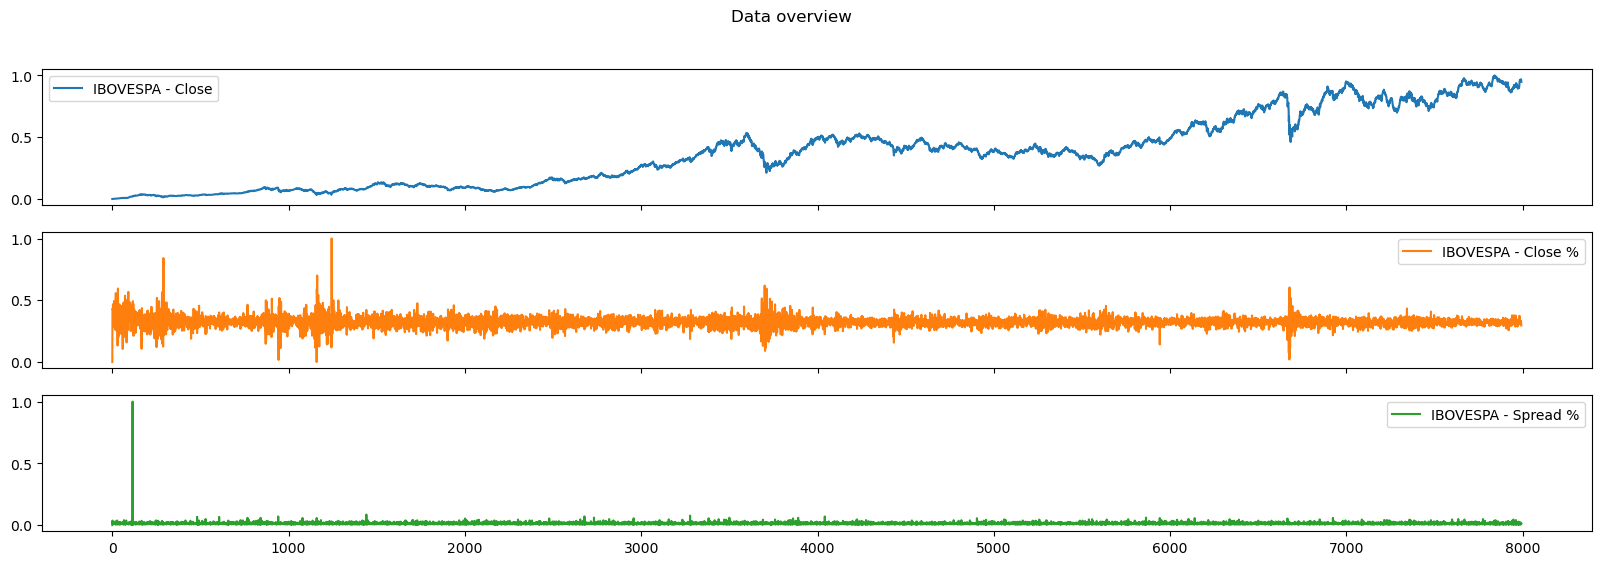

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

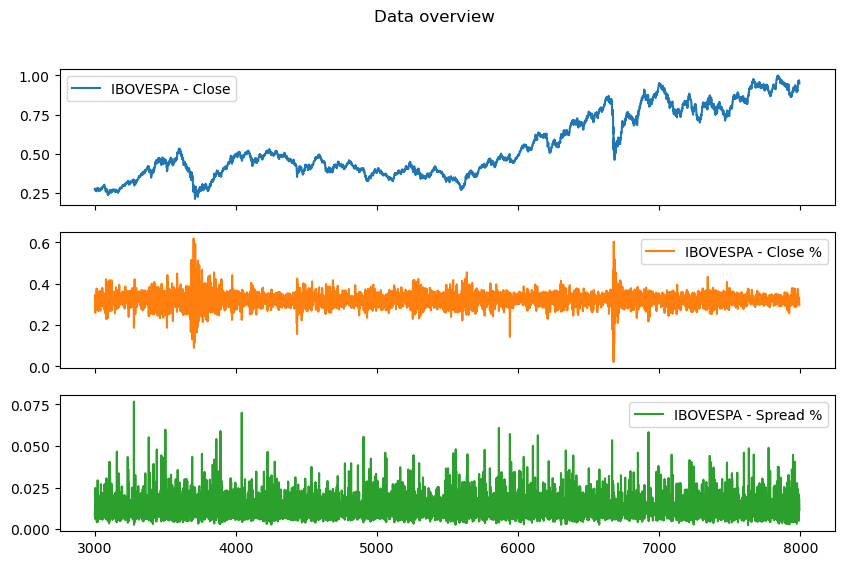

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

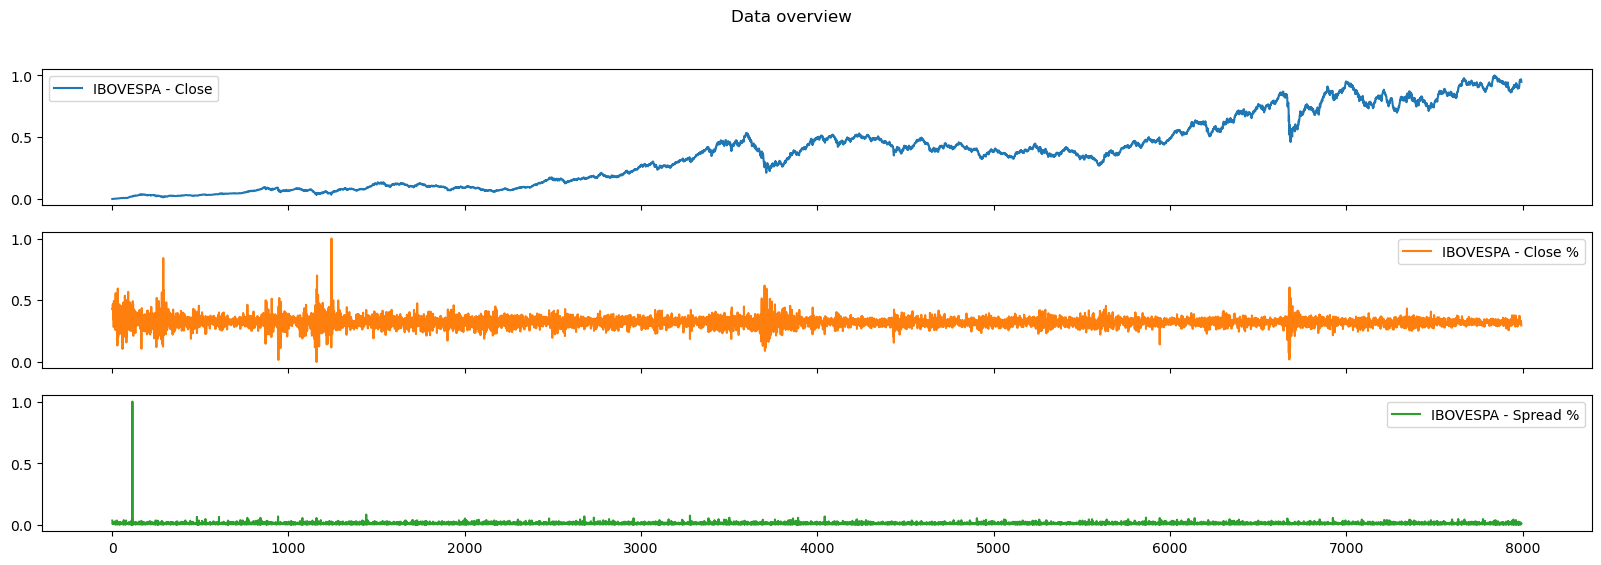

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

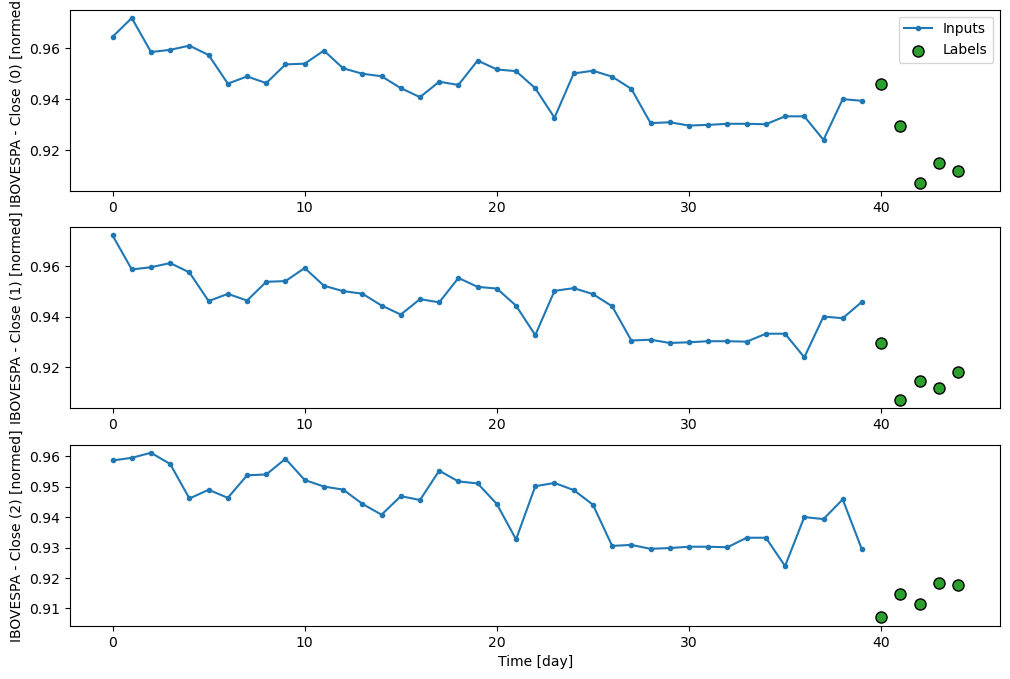

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13:35 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 101.7329 - mean_squared_error: 1.0213e-04 - root_mean_squared_error: 0.0100 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 84.4146 - mean_squared_error: 1.1427e-04 - root_mean_squared_error: 0.0106 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 79.1008 - mean_squared_error: 1.4712e-04 - root_mean_squared_error: 0.0119

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 74.2680 - mean_squared_error: 1.5636e-04 - root_mean_squared_error: 0.0123

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 69.4624 - mean_squared_error: 1.5516e-04 - root_mean_squared_error: 0.0123

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 65.0717 - mean_squared_error: 1.5049e-04 - root_mean_squared_error: 0.0121

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.4908 - mean_squared_error: 1.4701e-04 - root_mean_squared_error: 0.0120

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 59.0380 - mean_squared_error: 1.4168e-04 - root_mean_squared_error: 0.0118

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.0839 - mean_squared_error: 1.3782e-04 - root_mean_squared_error: 0.0116

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.5593 - mean_squared_error: 1.3638e-04 - root_mean_squared_error: 0.0116

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.4586 - mean_squared_error: 1.3785e-04 - root_mean_squared_error: 0.0116

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.6045 - mean_squared_error: 1.3917e-04 - root_mean_squared_error: 0.0117

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.5438 - mean_squared_error: 1.4044e-04 - root_mean_squared_error: 0.0118

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.1145 - mean_squared_error: 1.4236e-04 - root_mean_squared_error: 0.0118

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.8720 - mean_squared_error: 1.4567e-04 - root_mean_squared_error: 0.0120

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.7763 - mean_squared_error: 1.5080e-04 - root_mean_squared_error: 0.0122

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.7891 - mean_squared_error: 1.5827e-04 - root_mean_squared_error: 0.0124

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.8356 - mean_squared_error: 1.6414e-04 - root_mean_squared_error: 0.0127

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.9310 - mean_squared_error: 1.6897e-04 - root_mean_squared_error: 0.0128

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.3462 - mean_squared_error: 1.7159e-04 - root_mean_squared_error: 0.0129

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.7859 - mean_squared_error: 1.7393e-04 - root_mean_squared_error: 0.0130

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 39.9897 - mean_squared_error: 1.7704e-04 - root_mean_squared_error: 0.0131

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 39.2402 - mean_squared_error: 1.7966e-04 - root_mean_squared_error: 0.0132

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 38.5667 - mean_squared_error: 1.8247e-04 - root_mean_squared_error: 0.0133

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 37.9303 - mean_squared_error: 1.8488e-04 - root_mean_squared_error: 0.0134

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 37.3475 - mean_squared_error: 1.8781e-04 - root_mean_squared_error: 0.0135

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 36.8327 - mean_squared_error: 1.9441e-04 - root_mean_squared_error: 0.0137

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 36.3727 - mean_squared_error: 2.0478e-04 - root_mean_squared_error: 0.0140

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 35.9345 - mean_squared_error: 2.1476e-04 - root_mean_squared_error: 0.0143

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 35.5087 - mean_squared_error: 2.2390e-04 - root_mean_squared_error: 0.0146

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 35.0900 - mean_squared_error: 2.3204e-04 - root_mean_squared_error: 0.0148

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 34.6867 - mean_squared_error: 2.4014e-04 - root_mean_squared_error: 0.0151

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 34.3040 - mean_squared_error: 2.4961e-04 - root_mean_squared_error: 0.0153

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.9380 - mean_squared_error: 2.5972e-04 - root_mean_squared_error: 0.0156

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 33.5832 - mean_squared_error: 2.6979e-04 - root_mean_squared_error: 0.0158

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 33.3533 - mean_squared_error: 2.7672e-04 - root_mean_squared_error: 0.0160

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 33.0196 - mean_squared_error: 2.8850e-04 - root_mean_squared_error: 0.0163

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 32.6954 - mean_squared_error: 3.0173e-04 - root_mean_squared_error: 0.0166

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 32.3852 - mean_squared_error: 3.1878e-04 - root_mean_squared_error: 0.0170

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 32.0835 - mean_squared_error: 3.3575e-04 - root_mean_squared_error: 0.0174

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 31.7996 - mean_squared_error: 3.5490e-04 - root_mean_squared_error: 0.0178

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 31.5277 - mean_squared_error: 3.7571e-04 - root_mean_squared_error: 0.0182

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 31.2784 - mean_squared_error: 4.1043e-04 - root_mean_squared_error: 0.0188

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 31.0535 - mean_squared_error: 4.6820e-04 - root_mean_squared_error: 0.0196

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 30.8467 - mean_squared_error: 5.3824e-04 - root_mean_squared_error: 0.0205

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 30.6527 - mean_squared_error: 6.1415e-04 - root_mean_squared_error: 0.0214

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 30.4627 - mean_squared_error: 6.8749e-04 - root_mean_squared_error: 0.0224

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 30.2816 - mean_squared_error: 7.6090e-04 - root_mean_squared_error: 0.0233

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 30.1640 - mean_squared_error: 8.0870e-04 - root_mean_squared_error: 0.0238

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 30.0472 - mean_squared_error: 8.5476e-04 - root_mean_squared_error: 0.0244

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 29.8723 - mean_squared_error: 9.2040e-04 - root_mean_squared_error: 0.0252

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 29.7559 - mean_squared_error: 9.6192e-04 - root_mean_squared_error: 0.0257

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 29.6397 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0262    

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 29.4670 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0269

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 29.4108 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 29.2992 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 29.1887 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 29.0791 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 28.9704 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 28.8635 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 28.7039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 28.5454 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 28.4411 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 28.3392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 28.2392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 28.0901 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0319

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 27.9928 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0322

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 27.8975 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 27.7581 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 27.6672 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 27.5779 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 27.4903 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 27.4033 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 27.3169 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0345

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 27.2308 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0348

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 27.1022 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 27.0166 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 26.8886 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 26.7636 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.6425 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 26.5230 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0370

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 26.4066 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 26.3686 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 26.2551 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 26.1798 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0383

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 26.0674 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 25.9558 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 25.8446 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 25.7342 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 25.6617 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400 - val_loss: 0.0726 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 7.6960 - val_mean_squared_error: 0.0058 - val_root_mean_squared_error: 0.0764 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.6245 - mean_absolute_error: 0.6245 - mean_absolute_percentage_error: 8295.1104 - mean_squared_error: 0.3901 - root_mean_squared_error: 0.6246

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6255 - mean_absolute_error: 0.6255 - mean_absolute_percentage_error: 6360.0400 - mean_squared_error: 0.3914 - root_mean_squared_error: 0.6256 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6214 - mean_absolute_error: 0.6214 - mean_absolute_percentage_error: 5527.4038 - mean_squared_error: 0.3863 - root_mean_squared_error: 0.6215

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6113 - mean_absolute_error: 0.6113 - mean_absolute_percentage_error: 4799.9521 - mean_squared_error: 0.3746 - root_mean_squared_error: 0.6118

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5975 - mean_absolute_error: 0.5975 - mean_absolute_percentage_error: 4338.5327 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.5995

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5816 - mean_absolute_error: 0.5816 - mean_absolute_percentage_error: 3990.6667 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5759 - mean_absolute_error: 0.5759 - mean_absolute_percentage_error: 3890.3291 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5819

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 3623.4238 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5675

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5473 - mean_absolute_error: 0.5473 - mean_absolute_percentage_error: 3469.4297 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5596

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5430 - mean_absolute_error: 0.5430 - mean_absolute_percentage_error: 3400.6067 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5568

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5385 - mean_absolute_error: 0.5385 - mean_absolute_percentage_error: 3334.6196 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5538

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5235 - mean_absolute_error: 0.5235 - mean_absolute_percentage_error: 3150.4814 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5439

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5078 - mean_absolute_error: 0.5078 - mean_absolute_percentage_error: 2986.1353 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5335

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 2839.3748 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5231

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4775 - mean_absolute_error: 0.4775 - mean_absolute_percentage_error: 2707.5637 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.5128

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2588.8391 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.5029

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4495 - mean_absolute_error: 0.4495 - mean_absolute_percentage_error: 2481.1660 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4933

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - mean_absolute_percentage_error: 2383.0784 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4842

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 2293.2107 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4755

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2210.6016 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4671

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 2134.3774 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4592

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 2063.8228 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4516

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1998.3259 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4444

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 1937.3783 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4375

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1880.5182 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4309

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1827.3611 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4246

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1777.5118 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4185

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1730.6683 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4128

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1686.5385 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.4072

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1644.8926 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.4019

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1605.5304 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3968

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1568.2448 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3919

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1532.8695 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3872

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1510.2700 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3841

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1488.4095 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3811

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1456.9258 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3768

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1426.9177 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3726

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1407.6755 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3699

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1389.0111 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3673

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1370.9001 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3647

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1353.3171 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3621

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1327.8785 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3585

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1303.4950 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3549

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1280.1251 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3514

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1257.7224 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3482

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1236.2014 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3450

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1222.3105 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3430

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1208.7695 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3409

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1195.5648 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3390

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1182.6824 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3370

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1170.1101 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3351

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1151.8060 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3323

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1134.1381 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3296

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1122.6991 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3278

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1111.5184 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3261

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1095.2096 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3235

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1079.4303 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3211

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1064.1550 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3186

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1049.3586 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3162

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1035.0175 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3139

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1021.1104 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3117

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1007.6179 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3094

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 994.5206 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3073 

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 981.7998 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3052

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 969.4396 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3031

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 957.4266 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.3011

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 945.7441 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2991

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 934.3792 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2971

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 923.3193 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2952

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 912.5503 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2934

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 902.0597 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2915

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 891.8359 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2898

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 881.8704 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2880

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 872.1523 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2863

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 862.6710 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2846

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 853.4177 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2830

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 844.3846 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2813

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 835.5673 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2798

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 826.9559 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2782

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 818.5410 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2767

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 810.3159 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2752

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 802.2740 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2738

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 794.4088 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2723

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 786.7141 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2709

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 779.1844 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2695

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 769.3917 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2677

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 764.6069 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2668 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327 - val_mean_absolute_percentage_error: 3.4514 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0371 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.4985 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 6619.3169 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4985

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 5044.8096 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4941 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 4139.3809 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4868

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 3662.2358 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4781

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 3334.2595 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4676

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 3075.3391 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4553

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 2853.8623 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4418

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2663.1260 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4283

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3988 - mean_absolute_error: 0.3988 - mean_absolute_percentage_error: 2496.9934 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.4155

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2351.5332 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.4034

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 2223.4319 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3922

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 2109.8433 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3817

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 2008.5426 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1917.5889 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3631

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1835.4338 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3547

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1760.8090 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3469

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1692.6953 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3395

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1630.2516 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3327

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1572.7819 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3262

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1519.6978 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.3201

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1470.5015 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3144

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1424.7675 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3089

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1382.1338 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3038

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1342.2870 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2989

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1304.9514 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2942

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1269.8849 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2898

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1236.8792 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2856

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1205.7522 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2815

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1176.3423 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2776

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 1148.5072 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2739

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1122.1180 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2704

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 1097.0625 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2670

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1073.2362 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 1050.5487 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2605

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1028.9139 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2575

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 1008.2592 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2546

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 988.5154 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2517 

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 969.6223 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2490

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 951.5262 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2464

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 934.1793 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2438

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 917.5316 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2413

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 901.5458 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2390

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 886.1813 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2367

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 871.3959 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2345

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 857.1534 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2323

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 843.4261 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2302

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 830.1870 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2282

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 817.4072 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2263

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 801.0390 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2237

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 789.2371 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2219

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 777.8181 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2201

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 766.7656 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2183

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 756.0601 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2166

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 745.6843 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2150

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 735.6245 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2133

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 725.8647 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2118

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 716.3901 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2102

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 707.1897 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2087

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 698.2524 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2072

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 689.5643 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2058

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 681.1162 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2044

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 672.8978 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2030

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 664.8981 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2017

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 657.1077 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2003

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 649.5186 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.1990

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 642.1233 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.1978

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 634.9139 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.1965

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 627.8833 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.1953

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 621.0240 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1941

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 614.3311 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1930

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 607.7985 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1918

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 601.4196 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1907

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 595.1898 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1896

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 589.1031 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1886

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 583.1541 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1876

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 577.3377 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1865

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 571.6495 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1855

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 566.0849 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1846

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 558.8522 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1833

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 557.0799 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1830 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2563 - val_mean_squared_error: 2.2180e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 3440.3921 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2591

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 2610.1377 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2546 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 2125.6218 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2467

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1844.3053 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2360

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1579.5428 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2206

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1438.1163 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2111

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 1323.4596 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2026

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1228.0933 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1950

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 1147.5129 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1882

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 1077.9869 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1821

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1017.5551 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1765

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 964.3832 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1715 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 917.3001 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1668

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 875.1901 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1626

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 837.2576 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1586

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 802.8691 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1550

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 771.5385 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1515

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 742.8544 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1484

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 708.1568 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1444

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 684.4431 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1417

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 655.4796 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1382

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 635.5100 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1358

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 616.8683 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1336

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 599.4205 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1314

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 583.0498 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1294

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 567.6572 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1274

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 553.1546 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1255

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 539.4626 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1237

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 526.5129 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1220

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 514.2449 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1204

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 502.6039 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1188

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 491.5416 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1173

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 481.0140 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1159

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 470.9815 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1145

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 461.4083 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1132

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 452.2631 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1119

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 440.6847 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1102

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 432.4304 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1090

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 424.5182 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1079

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 416.9251 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1068

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 409.6305 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1057

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 402.6163 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1047

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 395.8662 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1037

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 389.3651 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1027

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 383.0988 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1018

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 375.0882 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1006

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 369.3232 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0997

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 363.7533 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0988

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 358.3682 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0980

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 353.1584 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0972

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 348.1158 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0964

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 343.2317 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0956

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 338.4983 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0949

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 333.9088 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0941

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 329.4568 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0934

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 325.1353 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0927

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 320.9388 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0920

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 316.8621 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0914

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 312.9001 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0907

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 309.0473 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0901

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 305.2993 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0895

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 301.6516 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0889

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 299.2737 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0885

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 295.7845 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0879

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 292.3857 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0873

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 289.0731 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0868

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 285.8431 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0862

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 282.6926 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0857

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 279.6193 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0852

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 276.6205 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0847

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 273.6929 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0842

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 270.8343 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0837

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 267.1260 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0831

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 264.4196 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0827

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 261.7739 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0822

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 259.1875 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0818

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 256.6579 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0814

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 253.3722 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0809 - val_loss: 0.0192 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 2.0833 - val_mean_squared_error: 5.1324e-04 - val_root_mean_squared_error: 0.0227 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 2014.4622 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1519

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1516.1948 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1470 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1220.1132 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1389

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1035.5626 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1298

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 878.2786 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1202 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 796.7609 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1147

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 730.9900 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1098

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 677.1859 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1055

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 631.7526 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1017

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 592.8029 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0983

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 558.9564 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0952

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 529.2568 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0925

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 503.0114 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0899

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 479.6068 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0876

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 458.5728 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0854

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 433.5855 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0828

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 416.7761 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0810

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 401.3807 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0793

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 387.2235 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0777

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 374.1549 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 358.2104 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0743

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 347.2291 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 336.9865 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0718

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 327.4068 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0706

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 318.4227 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 309.9794 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 302.0279 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 294.5234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 287.4283 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 280.7090 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 274.3357 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 268.2816 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 262.5225 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 255.2643 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 250.1109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 245.1876 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 240.4781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 235.9704 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 231.6511 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 227.5069 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 223.5260 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 219.6986 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 216.0159 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 212.4691 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 207.9390 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 204.6819 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 200.5145 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 197.5121 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 194.6088 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 191.7997 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 189.0803 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 186.4461 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 183.8929 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 181.4174 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 179.0155 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 175.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 173.6794 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 171.5005 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 169.3820 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 167.3214 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 165.3164 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 163.3649 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 160.8424 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 159.0078 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 157.2198 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 155.4765 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 153.7758 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0464

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 152.1174 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 150.4988 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 148.9190 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0457

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 147.3761 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0455

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 145.8694 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 144.3973 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 142.9583 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 141.5515 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 140.1755 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0445

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 138.3882 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443 - val_loss: 0.0392 - val_mean_absolute_error: 0.0392 - val_mean_absolute_percentage_error: 4.1671 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0415 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1307.2502 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0987

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 967.3297 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 762.5643 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 641.7603 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 566.0286 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0734

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 509.9952 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 453.6784 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 420.4572 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 392.5091 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0610

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 368.5918 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0591

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 341.5430 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0568

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 324.0833 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 308.6188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 294.7725 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 282.2915 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0513

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 267.4233 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 257.3906 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 248.1858 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 239.7040 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 229.3834 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 222.2914 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 215.6918 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 207.5679 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 201.9221 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 196.6173 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 191.6228 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 186.9086 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 182.4513 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 178.2299 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 172.9345 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 169.1919 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 165.6289 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 162.2319 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 158.9892 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 155.8905 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 152.9260 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 150.0888 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 147.3721 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 143.9215 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 141.4536 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 138.3098 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 136.0555 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 133.8828 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.7874 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 129.7652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 127.8124 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 125.9254 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.1002 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 122.3339 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 120.0657 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 118.4259 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 116.3167 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.7905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 112.8247 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 110.9338 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.5625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.2291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.9320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.6697 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.4411 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.2446 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.6979 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.5721 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 99.4743 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298 

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 98.4032 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 97.0162 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 96.0053 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 95.0187 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 94.0552 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 93.1146 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 91.8944 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.0032 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 89.8461 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 89.0001 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 88.4470 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.7358 - val_mean_squared_error: 3.6748e-04 - val_root_mean_squared_error: 0.0192 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1385.8108 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1054

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1036.0070 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1008 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 774.8396 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 664.5264 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0848

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 570.9879 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0789

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 504.3201 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0741

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 465.3038 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0710

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 422.9405 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0675

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 396.5143 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0652

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 373.6109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 353.5290 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0612

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 330.3384 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0589

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 315.1003 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 301.3781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 288.9512 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 277.6412 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 267.2942 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 257.7891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 249.0235 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 240.9119 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 233.3796 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 226.3657 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 219.8149 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 213.6803 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 207.9217 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 202.5063 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 197.4018 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 191.0327 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 186.5539 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 182.3079 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 178.2766 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 174.4442 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 170.7942 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 167.3132 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 162.9151 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 159.7847 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 156.7895 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 153.9203 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 151.1676 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 148.5238 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 145.1567 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.7421 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 140.4162 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 138.1741 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 136.0118 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 133.2453 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.2524 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 129.3254 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 127.4611 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 125.6564 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.9083 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 122.2140 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 120.0352 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 118.4576 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.9261 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 115.4389 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.9938 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 113.0528 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.6737 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.3320 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 109.0261 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.7545 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.5164 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.3101 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.1344 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.9880 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.8698 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.4217 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.3660 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.3351 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.3283 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.3446 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.3834 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.4437 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.5249 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.6262 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.0387 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248 - val_mean_absolute_percentage_error: 2.6290 - val_mean_squared_error: 7.8141e-04 - val_root_mean_squared_error: 0.0280 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 728.8844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 532.7489 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 415.1050 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 353.3557 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 312.2116 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 282.0534 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 258.4671 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 239.2929 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 223.1922 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 205.3254 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 194.0166 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 184.0860 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 175.3087 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 167.4654 - mean_squared_error: 9.5840e-04 - root_mean_squared_error: 0.0296

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.3969 - mean_squared_error: 9.2014e-04 - root_mean_squared_error: 0.0290

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 151.9754 - mean_squared_error: 8.7428e-04 - root_mean_squared_error: 0.0281

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.2983 - mean_squared_error: 8.4324e-04 - root_mean_squared_error: 0.0276

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 141.0867 - mean_squared_error: 8.1462e-04 - root_mean_squared_error: 0.0271

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 136.2859 - mean_squared_error: 7.8815e-04 - root_mean_squared_error: 0.0266

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.8469 - mean_squared_error: 7.6358e-04 - root_mean_squared_error: 0.0261

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 127.7309 - mean_squared_error: 7.4072e-04 - root_mean_squared_error: 0.0257

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 123.9009 - mean_squared_error: 7.1936e-04 - root_mean_squared_error: 0.0252

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.3285 - mean_squared_error: 6.9937e-04 - root_mean_squared_error: 0.0248

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 116.9866 - mean_squared_error: 6.8060e-04 - root_mean_squared_error: 0.0245

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.8522 - mean_squared_error: 6.6296e-04 - root_mean_squared_error: 0.0241

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 110.9047 - mean_squared_error: 6.4636e-04 - root_mean_squared_error: 0.0238

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.1293 - mean_squared_error: 6.3074e-04 - root_mean_squared_error: 0.0234

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 105.5091 - mean_squared_error: 6.1598e-04 - root_mean_squared_error: 0.0231

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.0307 - mean_squared_error: 6.0201e-04 - root_mean_squared_error: 0.0228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 100.6832 - mean_squared_error: 5.8880e-04 - root_mean_squared_error: 0.0225

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.4562 - mean_squared_error: 5.7631e-04 - root_mean_squared_error: 0.0223 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.6590 - mean_squared_error: 5.6077e-04 - root_mean_squared_error: 0.0219

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 93.6804 - mean_squared_error: 5.4994e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.1850 - mean_squared_error: 5.3643e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.4122 - mean_squared_error: 5.2699e-04 - root_mean_squared_error: 0.0212

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.7177 - mean_squared_error: 5.1819e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.0959 - mean_squared_error: 5.0990e-04 - root_mean_squared_error: 0.0208

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.5434 - mean_squared_error: 5.0225e-04 - root_mean_squared_error: 0.0207

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.0560 - mean_squared_error: 4.9508e-04 - root_mean_squared_error: 0.0205

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.6281 - mean_squared_error: 4.8826e-04 - root_mean_squared_error: 0.0204

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.2555 - mean_squared_error: 4.8173e-04 - root_mean_squared_error: 0.0203

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.9349 - mean_squared_error: 4.7547e-04 - root_mean_squared_error: 0.0201

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.6632 - mean_squared_error: 4.6946e-04 - root_mean_squared_error: 0.0200

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.4374 - mean_squared_error: 4.6366e-04 - root_mean_squared_error: 0.0199

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.2549 - mean_squared_error: 4.5804e-04 - root_mean_squared_error: 0.0198

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.1139 - mean_squared_error: 4.5267e-04 - root_mean_squared_error: 0.0196

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.0119 - mean_squared_error: 4.4749e-04 - root_mean_squared_error: 0.0195

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.9471 - mean_squared_error: 4.4250e-04 - root_mean_squared_error: 0.0194

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.9173 - mean_squared_error: 4.3767e-04 - root_mean_squared_error: 0.0193

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.9206 - mean_squared_error: 4.3298e-04 - root_mean_squared_error: 0.0192

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.9556 - mean_squared_error: 4.2844e-04 - root_mean_squared_error: 0.0191

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.0206 - mean_squared_error: 4.2402e-04 - root_mean_squared_error: 0.0190

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.8180 - mean_squared_error: 4.1831e-04 - root_mean_squared_error: 0.0189

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.6635 - mean_squared_error: 4.1285e-04 - root_mean_squared_error: 0.0188

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.8273 - mean_squared_error: 4.0890e-04 - root_mean_squared_error: 0.0187

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.0151 - mean_squared_error: 4.0505e-04 - root_mean_squared_error: 0.0186

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.2262 - mean_squared_error: 4.0131e-04 - root_mean_squared_error: 0.0185

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.4595 - mean_squared_error: 3.9769e-04 - root_mean_squared_error: 0.0184

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4698 - mean_squared_error: 3.9302e-04 - root_mean_squared_error: 0.0183

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.7508 - mean_squared_error: 3.8963e-04 - root_mean_squared_error: 0.0182

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.8215 - mean_squared_error: 3.8525e-04 - root_mean_squared_error: 0.0181

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.1456 - mean_squared_error: 3.8208e-04 - root_mean_squared_error: 0.0181

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.4872 - mean_squared_error: 3.7905e-04 - root_mean_squared_error: 0.0180

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.8455 - mean_squared_error: 3.7615e-04 - root_mean_squared_error: 0.0179

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.2202 - mean_squared_error: 3.7344e-04 - root_mean_squared_error: 0.0179

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.6101 - mean_squared_error: 3.7083e-04 - root_mean_squared_error: 0.0178

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.0148 - mean_squared_error: 3.6831e-04 - root_mean_squared_error: 0.0178

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.4344 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0177

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.8678 - mean_squared_error: 3.6441e-04 - root_mean_squared_error: 0.0177

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.3147 - mean_squared_error: 3.6271e-04 - root_mean_squared_error: 0.0177

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.7742 - mean_squared_error: 3.6109e-04 - root_mean_squared_error: 0.0176

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.2461 - mean_squared_error: 3.5962e-04 - root_mean_squared_error: 0.0176

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.7301 - mean_squared_error: 3.5832e-04 - root_mean_squared_error: 0.0176

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.2256 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0176

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 51.7322 - mean_squared_error: 3.5609e-04 - root_mean_squared_error: 0.0176

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 51.2497 - mean_squared_error: 3.5515e-04 - root_mean_squared_error: 0.0176

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.6230 - mean_squared_error: 3.5403e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210 - val_mean_absolute_percentage_error: 2.2265 - val_mean_squared_error: 5.8423e-04 - val_root_mean_squared_error: 0.0242 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 660.2095 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 482.6917 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 355.1223 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 309.6543 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 277.0553 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 252.4302 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 232.5540 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 216.1500 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 202.2667 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 190.3220 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 179.9582 - mean_squared_error: 9.8191e-04 - root_mean_squared_error: 0.0303

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 170.8452 - mean_squared_error: 9.3597e-04 - root_mean_squared_error: 0.0295

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 162.7986 - mean_squared_error: 8.9501e-04 - root_mean_squared_error: 0.0288

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 155.6102 - mean_squared_error: 8.5815e-04 - root_mean_squared_error: 0.0281

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 147.1185 - mean_squared_error: 8.1432e-04 - root_mean_squared_error: 0.0273

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.4275 - mean_squared_error: 7.8486e-04 - root_mean_squared_error: 0.0268

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 136.2230 - mean_squared_error: 7.5780e-04 - root_mean_squared_error: 0.0263

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.4413 - mean_squared_error: 7.3282e-04 - root_mean_squared_error: 0.0258

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 127.0333 - mean_squared_error: 7.0968e-04 - root_mean_squared_error: 0.0253

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 122.9546 - mean_squared_error: 6.8816e-04 - root_mean_squared_error: 0.0249

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.1701 - mean_squared_error: 6.6811e-04 - root_mean_squared_error: 0.0245

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 115.6487 - mean_squared_error: 6.4937e-04 - root_mean_squared_error: 0.0241

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.3659 - mean_squared_error: 6.3183e-04 - root_mean_squared_error: 0.0237

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.2950 - mean_squared_error: 6.1535e-04 - root_mean_squared_error: 0.0234

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.4117 - mean_squared_error: 5.9984e-04 - root_mean_squared_error: 0.0231

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.6983 - mean_squared_error: 5.8521e-04 - root_mean_squared_error: 0.0227

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.1414 - mean_squared_error: 5.7143e-04 - root_mean_squared_error: 0.0224

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.7267 - mean_squared_error: 5.5841e-04 - root_mean_squared_error: 0.0222 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.4416 - mean_squared_error: 5.4608e-04 - root_mean_squared_error: 0.0219

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.2763 - mean_squared_error: 5.3443e-04 - root_mean_squared_error: 0.0216

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.2218 - mean_squared_error: 5.2345e-04 - root_mean_squared_error: 0.0214

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.2693 - mean_squared_error: 5.1312e-04 - root_mean_squared_error: 0.0211

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.4133 - mean_squared_error: 5.0355e-04 - root_mean_squared_error: 0.0209

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.6443 - mean_squared_error: 4.9453e-04 - root_mean_squared_error: 0.0207

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.9563 - mean_squared_error: 4.8606e-04 - root_mean_squared_error: 0.0205

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.3433 - mean_squared_error: 4.7816e-04 - root_mean_squared_error: 0.0204

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.8004 - mean_squared_error: 4.7085e-04 - root_mean_squared_error: 0.0202

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.3226 - mean_squared_error: 4.6398e-04 - root_mean_squared_error: 0.0200

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.9080 - mean_squared_error: 4.5778e-04 - root_mean_squared_error: 0.0199

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.5513 - mean_squared_error: 4.5195e-04 - root_mean_squared_error: 0.0198

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.2491 - mean_squared_error: 4.4658e-04 - root_mean_squared_error: 0.0197

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.9969 - mean_squared_error: 4.4152e-04 - root_mean_squared_error: 0.0196

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.7922 - mean_squared_error: 4.3682e-04 - root_mean_squared_error: 0.0195

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.6318 - mean_squared_error: 4.3238e-04 - root_mean_squared_error: 0.0194

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.5131 - mean_squared_error: 4.2816e-04 - root_mean_squared_error: 0.0193

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.4337 - mean_squared_error: 4.2412e-04 - root_mean_squared_error: 0.0192

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.3923 - mean_squared_error: 4.2035e-04 - root_mean_squared_error: 0.0191

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.3861 - mean_squared_error: 4.1672e-04 - root_mean_squared_error: 0.0191

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.4135 - mean_squared_error: 4.1325e-04 - root_mean_squared_error: 0.0190

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.4722 - mean_squared_error: 4.0986e-04 - root_mean_squared_error: 0.0189

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.5607 - mean_squared_error: 4.0655e-04 - root_mean_squared_error: 0.0189

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.6777 - mean_squared_error: 4.0331e-04 - root_mean_squared_error: 0.0188

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.8216 - mean_squared_error: 4.0014e-04 - root_mean_squared_error: 0.0187

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.9914 - mean_squared_error: 3.9704e-04 - root_mean_squared_error: 0.0187

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.1859 - mean_squared_error: 3.9403e-04 - root_mean_squared_error: 0.0186

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.4040 - mean_squared_error: 3.9111e-04 - root_mean_squared_error: 0.0185

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.3961 - mean_squared_error: 3.8730e-04 - root_mean_squared_error: 0.0185

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.6649 - mean_squared_error: 3.8451e-04 - root_mean_squared_error: 0.0184

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.9542 - mean_squared_error: 3.8181e-04 - root_mean_squared_error: 0.0184

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.2626 - mean_squared_error: 3.7915e-04 - root_mean_squared_error: 0.0183

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 57.5895 - mean_squared_error: 3.7655e-04 - root_mean_squared_error: 0.0182

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 56.9340 - mean_squared_error: 3.7401e-04 - root_mean_squared_error: 0.0182

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 56.2954 - mean_squared_error: 3.7151e-04 - root_mean_squared_error: 0.0181

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 55.6730 - mean_squared_error: 3.6909e-04 - root_mean_squared_error: 0.0181

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 55.0663 - mean_squared_error: 3.6673e-04 - root_mean_squared_error: 0.0180

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 54.4747 - mean_squared_error: 3.6448e-04 - root_mean_squared_error: 0.0180

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 53.8977 - mean_squared_error: 3.6230e-04 - root_mean_squared_error: 0.0179

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 53.3345 - mean_squared_error: 3.6019e-04 - root_mean_squared_error: 0.0179

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 52.7849 - mean_squared_error: 3.5827e-04 - root_mean_squared_error: 0.0178

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 52.2488 - mean_squared_error: 3.5671e-04 - root_mean_squared_error: 0.0178

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 51.7253 - mean_squared_error: 3.5526e-04 - root_mean_squared_error: 0.0178

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 51.2141 - mean_squared_error: 3.5401e-04 - root_mean_squared_error: 0.0178

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 50.7144 - mean_squared_error: 3.5287e-04 - root_mean_squared_error: 0.0177

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 50.2262 - mean_squared_error: 3.5192e-04 - root_mean_squared_error: 0.0177

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 49.7490 - mean_squared_error: 3.5108e-04 - root_mean_squared_error: 0.0177

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 49.2821 - mean_squared_error: 3.5031e-04 - root_mean_squared_error: 0.0177

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 48.8255 - mean_squared_error: 3.4962e-04 - root_mean_squared_error: 0.0177

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 48.3786 - mean_squared_error: 3.4900e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 47.9418 - mean_squared_error: 3.4844e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7100 - val_mean_squared_error: 3.7011e-04 - val_root_mean_squared_error: 0.0192 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 425.3110 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 336.2051 - mean_squared_error: 9.6913e-04 - root_mean_squared_error: 0.0310

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 272.2230 - mean_squared_error: 8.1081e-04 - root_mean_squared_error: 0.0282

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 232.8902 - mean_squared_error: 7.0942e-04 - root_mean_squared_error: 0.0262

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 197.5413 - mean_squared_error: 6.1524e-04 - root_mean_squared_error: 0.0243

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 174.1151 - mean_squared_error: 5.5038e-04 - root_mean_squared_error: 0.0229

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 157.1537 - mean_squared_error: 5.0263e-04 - root_mean_squared_error: 0.0219

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 143.9450 - mean_squared_error: 4.6450e-04 - root_mean_squared_error: 0.0210

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 133.2297 - mean_squared_error: 4.3315e-04 - root_mean_squared_error: 0.0202

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 124.2646 - mean_squared_error: 4.0650e-04 - root_mean_squared_error: 0.0195

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 116.6005 - mean_squared_error: 3.8348e-04 - root_mean_squared_error: 0.0189

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 109.9699 - mean_squared_error: 3.6343e-04 - root_mean_squared_error: 0.0184

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 104.1559 - mean_squared_error: 3.4563e-04 - root_mean_squared_error: 0.0179

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 99.0418 - mean_squared_error: 3.2984e-04 - root_mean_squared_error: 0.0174 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 94.5084 - mean_squared_error: 3.1575e-04 - root_mean_squared_error: 0.0170

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 90.4434 - mean_squared_error: 3.0307e-04 - root_mean_squared_error: 0.0166

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 86.7797 - mean_squared_error: 2.9166e-04 - root_mean_squared_error: 0.0163

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 83.4605 - mean_squared_error: 2.8156e-04 - root_mean_squared_error: 0.0160

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 80.4267 - mean_squared_error: 2.7230e-04 - root_mean_squared_error: 0.0157

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 77.6429 - mean_squared_error: 2.6378e-04 - root_mean_squared_error: 0.0154

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.0779 - mean_squared_error: 2.5590e-04 - root_mean_squared_error: 0.0152

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.7081 - mean_squared_error: 2.4859e-04 - root_mean_squared_error: 0.0149

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.5105 - mean_squared_error: 2.4178e-04 - root_mean_squared_error: 0.0147

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.4720 - mean_squared_error: 2.3545e-04 - root_mean_squared_error: 0.0145

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.5751 - mean_squared_error: 2.2955e-04 - root_mean_squared_error: 0.0143

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.8018 - mean_squared_error: 2.2402e-04 - root_mean_squared_error: 0.0141

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.1375 - mean_squared_error: 2.1881e-04 - root_mean_squared_error: 0.0139

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.5723 - mean_squared_error: 2.1395e-04 - root_mean_squared_error: 0.0138

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.0991 - mean_squared_error: 2.0943e-04 - root_mean_squared_error: 0.0136

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.7071 - mean_squared_error: 2.0517e-04 - root_mean_squared_error: 0.0135

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.3897 - mean_squared_error: 2.0117e-04 - root_mean_squared_error: 0.0133

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.1415 - mean_squared_error: 1.9742e-04 - root_mean_squared_error: 0.0132

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.9562 - mean_squared_error: 1.9392e-04 - root_mean_squared_error: 0.0131

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.4665 - mean_squared_error: 1.8969e-04 - root_mean_squared_error: 0.0129

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.4111 - mean_squared_error: 1.8679e-04 - root_mean_squared_error: 0.0128

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.4039 - mean_squared_error: 1.8410e-04 - root_mean_squared_error: 0.0127

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.4418 - mean_squared_error: 1.8168e-04 - root_mean_squared_error: 0.0127

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.2239 - mean_squared_error: 1.7887e-04 - root_mean_squared_error: 0.0126

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.3553 - mean_squared_error: 1.7704e-04 - root_mean_squared_error: 0.0125

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.5244 - mean_squared_error: 1.7558e-04 - root_mean_squared_error: 0.0125

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.4689 - mean_squared_error: 1.7384e-04 - root_mean_squared_error: 0.0124

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.7134 - mean_squared_error: 1.7269e-04 - root_mean_squared_error: 0.0124

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.9864 - mean_squared_error: 1.7164e-04 - root_mean_squared_error: 0.0124

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.2865 - mean_squared_error: 1.7072e-04 - root_mean_squared_error: 0.0123

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.6117 - mean_squared_error: 1.6985e-04 - root_mean_squared_error: 0.0123

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.9606 - mean_squared_error: 1.6903e-04 - root_mean_squared_error: 0.0123

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.3322 - mean_squared_error: 1.6827e-04 - root_mean_squared_error: 0.0123

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.7254 - mean_squared_error: 1.6758e-04 - root_mean_squared_error: 0.0123

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.1388 - mean_squared_error: 1.6694e-04 - root_mean_squared_error: 0.0123

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.5715 - mean_squared_error: 1.6633e-04 - root_mean_squared_error: 0.0123

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.0221 - mean_squared_error: 1.6572e-04 - root_mean_squared_error: 0.0122

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.3163 - mean_squared_error: 1.6492e-04 - root_mean_squared_error: 0.0122

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.8057 - mean_squared_error: 1.6431e-04 - root_mean_squared_error: 0.0122

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.3104 - mean_squared_error: 1.6371e-04 - root_mean_squared_error: 0.0122

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.8297 - mean_squared_error: 1.6312e-04 - root_mean_squared_error: 0.0122

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.3634 - mean_squared_error: 1.6256e-04 - root_mean_squared_error: 0.0122

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.9103 - mean_squared_error: 1.6201e-04 - root_mean_squared_error: 0.0122

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.4701 - mean_squared_error: 1.6146e-04 - root_mean_squared_error: 0.0121

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.0422 - mean_squared_error: 1.6093e-04 - root_mean_squared_error: 0.0121

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.6262 - mean_squared_error: 1.6042e-04 - root_mean_squared_error: 0.0121

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.2213 - mean_squared_error: 1.5993e-04 - root_mean_squared_error: 0.0121

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.8271 - mean_squared_error: 1.5945e-04 - root_mean_squared_error: 0.0121

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.4431 - mean_squared_error: 1.5898e-04 - root_mean_squared_error: 0.0121

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.0689 - mean_squared_error: 1.5852e-04 - root_mean_squared_error: 0.0121

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 33.7041 - mean_squared_error: 1.5810e-04 - root_mean_squared_error: 0.0121

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 33.2320 - mean_squared_error: 1.5759e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 32.8880 - mean_squared_error: 1.5727e-04 - root_mean_squared_error: 0.0121

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 32.4422 - mean_squared_error: 1.5688e-04 - root_mean_squared_error: 0.0120

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 32.1173 - mean_squared_error: 1.5675e-04 - root_mean_squared_error: 0.0120

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.8005 - mean_squared_error: 1.5693e-04 - root_mean_squared_error: 0.0121

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.3897 - mean_squared_error: 1.5730e-04 - root_mean_squared_error: 0.0121

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.0899 - mean_squared_error: 1.5769e-04 - root_mean_squared_error: 0.0121

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 30.7970 - mean_squared_error: 1.5818e-04 - root_mean_squared_error: 0.0121

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 30.5107 - mean_squared_error: 1.5876e-04 - root_mean_squared_error: 0.0122

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 30.2308 - mean_squared_error: 1.5943e-04 - root_mean_squared_error: 0.0122

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 29.9570 - mean_squared_error: 1.6012e-04 - root_mean_squared_error: 0.0122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.6892 - mean_squared_error: 1.6087e-04 - root_mean_squared_error: 0.0123

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.4271 - mean_squared_error: 1.6169e-04 - root_mean_squared_error: 0.0123

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.2558 - mean_squared_error: 1.6224e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4305 - val_mean_squared_error: 2.8062e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 602.9594 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 437.1381 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 320.2592 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 277.7199 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 247.4650 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 225.0121 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 207.0144 - mean_squared_error: 9.7082e-04 - root_mean_squared_error: 0.0303

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 192.2395 - mean_squared_error: 9.0666e-04 - root_mean_squared_error: 0.0292

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 179.7842 - mean_squared_error: 8.5254e-04 - root_mean_squared_error: 0.0283

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 169.0997 - mean_squared_error: 8.0614e-04 - root_mean_squared_error: 0.0274

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.8599 - mean_squared_error: 7.6605e-04 - root_mean_squared_error: 0.0267

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 151.7525 - mean_squared_error: 7.3052e-04 - root_mean_squared_error: 0.0260

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 144.5940 - mean_squared_error: 6.9881e-04 - root_mean_squared_error: 0.0254

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 138.1969 - mean_squared_error: 6.7019e-04 - root_mean_squared_error: 0.0248

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 134.2885 - mean_squared_error: 6.5258e-04 - root_mean_squared_error: 0.0245

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 128.8819 - mean_squared_error: 6.2806e-04 - root_mean_squared_error: 0.0239

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.9585 - mean_squared_error: 6.0566e-04 - root_mean_squared_error: 0.0235

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 119.4502 - mean_squared_error: 5.8504e-04 - root_mean_squared_error: 0.0230

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 115.3048 - mean_squared_error: 5.6599e-04 - root_mean_squared_error: 0.0226

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 111.4790 - mean_squared_error: 5.4832e-04 - root_mean_squared_error: 0.0222

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.9375 - mean_squared_error: 5.3188e-04 - root_mean_squared_error: 0.0218

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 104.6477 - mean_squared_error: 5.1655e-04 - root_mean_squared_error: 0.0215

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.6098 - mean_squared_error: 4.9762e-04 - root_mean_squared_error: 0.0210

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.8129 - mean_squared_error: 4.8445e-04 - root_mean_squared_error: 0.0207 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.1906 - mean_squared_error: 4.7205e-04 - root_mean_squared_error: 0.0204

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.7248 - mean_squared_error: 4.6036e-04 - root_mean_squared_error: 0.0201

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.4032 - mean_squared_error: 4.4937e-04 - root_mean_squared_error: 0.0199

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.2127 - mean_squared_error: 4.3899e-04 - root_mean_squared_error: 0.0196

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.4753 - mean_squared_error: 4.2601e-04 - root_mean_squared_error: 0.0193

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.9279 - mean_squared_error: 4.1395e-04 - root_mean_squared_error: 0.0190

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.1303 - mean_squared_error: 4.0550e-04 - root_mean_squared_error: 0.0188

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.4215 - mean_squared_error: 3.9756e-04 - root_mean_squared_error: 0.0186

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.3291 - mean_squared_error: 3.9257e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.2709 - mean_squared_error: 3.8775e-04 - root_mean_squared_error: 0.0183

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.7448 - mean_squared_error: 3.8089e-04 - root_mean_squared_error: 0.0181

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.2875 - mean_squared_error: 3.7448e-04 - root_mean_squared_error: 0.0180

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.4435 - mean_squared_error: 3.6670e-04 - root_mean_squared_error: 0.0178

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.1290 - mean_squared_error: 3.6134e-04 - root_mean_squared_error: 0.0176

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.8714 - mean_squared_error: 3.5655e-04 - root_mean_squared_error: 0.0175

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.2745 - mean_squared_error: 3.5066e-04 - root_mean_squared_error: 0.0174

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.1327 - mean_squared_error: 3.4669e-04 - root_mean_squared_error: 0.0173

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.6780 - mean_squared_error: 3.4179e-04 - root_mean_squared_error: 0.0172

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.6348 - mean_squared_error: 3.3847e-04 - root_mean_squared_error: 0.0171

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.6296 - mean_squared_error: 3.3531e-04 - root_mean_squared_error: 0.0171

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.6600 - mean_squared_error: 3.3231e-04 - root_mean_squared_error: 0.0170

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.7249 - mean_squared_error: 3.2951e-04 - root_mean_squared_error: 0.0169

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.5278 - mean_squared_error: 3.2602e-04 - root_mean_squared_error: 0.0169

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.6651 - mean_squared_error: 3.2353e-04 - root_mean_squared_error: 0.0168

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.8302 - mean_squared_error: 3.2110e-04 - root_mean_squared_error: 0.0168

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.0218 - mean_squared_error: 3.1871e-04 - root_mean_squared_error: 0.0167

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.9831 - mean_squared_error: 3.1560e-04 - root_mean_squared_error: 0.0166

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.2319 - mean_squared_error: 3.1333e-04 - root_mean_squared_error: 0.0166

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.5032 - mean_squared_error: 3.1111e-04 - root_mean_squared_error: 0.0165

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.7963 - mean_squared_error: 3.0897e-04 - root_mean_squared_error: 0.0165

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.1100 - mean_squared_error: 3.0687e-04 - root_mean_squared_error: 0.0164

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.4433 - mean_squared_error: 3.0481e-04 - root_mean_squared_error: 0.0164

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.7954 - mean_squared_error: 3.0280e-04 - root_mean_squared_error: 0.0163

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.1657 - mean_squared_error: 3.0085e-04 - root_mean_squared_error: 0.0163

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.5531 - mean_squared_error: 2.9895e-04 - root_mean_squared_error: 0.0163

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.7617 - mean_squared_error: 2.9647e-04 - root_mean_squared_error: 0.0162

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.1863 - mean_squared_error: 2.9466e-04 - root_mean_squared_error: 0.0162

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.6256 - mean_squared_error: 2.9288e-04 - root_mean_squared_error: 0.0161

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.0793 - mean_squared_error: 2.9116e-04 - root_mean_squared_error: 0.0161

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.5466 - mean_squared_error: 2.8950e-04 - root_mean_squared_error: 0.0160

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.0272 - mean_squared_error: 2.8790e-04 - root_mean_squared_error: 0.0160

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 47.5204 - mean_squared_error: 2.8635e-04 - root_mean_squared_error: 0.0160

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.8635 - mean_squared_error: 2.8436e-04 - root_mean_squared_error: 0.0159

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.3851 - mean_squared_error: 2.8332e-04 - root_mean_squared_error: 0.0159

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 45.9180 - mean_squared_error: 2.8235e-04 - root_mean_squared_error: 0.0159

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.4620 - mean_squared_error: 2.8155e-04 - root_mean_squared_error: 0.0159

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.0163 - mean_squared_error: 2.8081e-04 - root_mean_squared_error: 0.0159

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 44.5808 - mean_squared_error: 2.8019e-04 - root_mean_squared_error: 0.0158

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 44.1551 - mean_squared_error: 2.7967e-04 - root_mean_squared_error: 0.0158

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 43.7388 - mean_squared_error: 2.7920e-04 - root_mean_squared_error: 0.0158

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 43.3315 - mean_squared_error: 2.7879e-04 - root_mean_squared_error: 0.0158

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 42.9331 - mean_squared_error: 2.7843e-04 - root_mean_squared_error: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 42.5433 - mean_squared_error: 2.7815e-04 - root_mean_squared_error: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 42.4155 - mean_squared_error: 2.7806e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0153 - val_mean_squared_error: 1.4947e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 497.5838 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 323.9076 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 260.6295 - mean_squared_error: 9.6404e-04 - root_mean_squared_error: 0.0306

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 225.4661 - mean_squared_error: 8.5179e-04 - root_mean_squared_error: 0.0287

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 200.5975 - mean_squared_error: 7.6688e-04 - root_mean_squared_error: 0.0271

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 182.0121 - mean_squared_error: 7.0162e-04 - root_mean_squared_error: 0.0258

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 167.1989 - mean_squared_error: 6.4831e-04 - root_mean_squared_error: 0.0247

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 154.9938 - mean_squared_error: 6.0363e-04 - root_mean_squared_error: 0.0238

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 144.7096 - mean_squared_error: 5.6566e-04 - root_mean_squared_error: 0.0230

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 135.8957 - mean_squared_error: 5.3296e-04 - root_mean_squared_error: 0.0222

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 128.2622 - mean_squared_error: 5.0453e-04 - root_mean_squared_error: 0.0216

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 121.5717 - mean_squared_error: 4.7946e-04 - root_mean_squared_error: 0.0210

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 115.6868 - mean_squared_error: 4.5728e-04 - root_mean_squared_error: 0.0204

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 110.4521 - mean_squared_error: 4.3747e-04 - root_mean_squared_error: 0.0199

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 105.7561 - mean_squared_error: 4.1969e-04 - root_mean_squared_error: 0.0195

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 101.5145 - mean_squared_error: 4.0373e-04 - root_mean_squared_error: 0.0191

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 97.6647 - mean_squared_error: 3.8948e-04 - root_mean_squared_error: 0.0187 

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 93.0343 - mean_squared_error: 3.7229e-04 - root_mean_squared_error: 0.0182

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 89.8888 - mean_squared_error: 3.6060e-04 - root_mean_squared_error: 0.0179

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 86.0680 - mean_squared_error: 3.4634e-04 - root_mean_squared_error: 0.0175

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 83.4457 - mean_squared_error: 3.3652e-04 - root_mean_squared_error: 0.0173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.0089 - mean_squared_error: 3.2736e-04 - root_mean_squared_error: 0.0170

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.0145 - mean_squared_error: 3.1604e-04 - root_mean_squared_error: 0.0167

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.9345 - mean_squared_error: 3.0815e-04 - root_mean_squared_error: 0.0164

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.9800 - mean_squared_error: 3.0072e-04 - root_mean_squared_error: 0.0162

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.1408 - mean_squared_error: 2.9375e-04 - root_mean_squared_error: 0.0160

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.8499 - mean_squared_error: 2.8510e-04 - root_mean_squared_error: 0.0158

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.2403 - mean_squared_error: 2.7903e-04 - root_mean_squared_error: 0.0156

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.7157 - mean_squared_error: 2.7331e-04 - root_mean_squared_error: 0.0154

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.2688 - mean_squared_error: 2.6791e-04 - root_mean_squared_error: 0.0152

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.8941 - mean_squared_error: 2.6286e-04 - root_mean_squared_error: 0.0151

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.1640 - mean_squared_error: 2.5661e-04 - root_mean_squared_error: 0.0149

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.9364 - mean_squared_error: 2.5223e-04 - root_mean_squared_error: 0.0148

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.7643 - mean_squared_error: 2.4815e-04 - root_mean_squared_error: 0.0146

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.6439 - mean_squared_error: 2.4439e-04 - root_mean_squared_error: 0.0145

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.5720 - mean_squared_error: 2.4095e-04 - root_mean_squared_error: 0.0144

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.5456 - mean_squared_error: 2.3786e-04 - root_mean_squared_error: 0.0143

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.5632 - mean_squared_error: 2.3511e-04 - root_mean_squared_error: 0.0143

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.6205 - mean_squared_error: 2.3253e-04 - root_mean_squared_error: 0.0142

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.7148 - mean_squared_error: 2.3014e-04 - root_mean_squared_error: 0.0141

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.8436 - mean_squared_error: 2.2791e-04 - root_mean_squared_error: 0.0141

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.0050 - mean_squared_error: 2.2582e-04 - root_mean_squared_error: 0.0140

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.1968 - mean_squared_error: 2.2384e-04 - root_mean_squared_error: 0.0140

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.4172 - mean_squared_error: 2.2195e-04 - root_mean_squared_error: 0.0139

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.6650 - mean_squared_error: 2.2016e-04 - root_mean_squared_error: 0.0139

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.9389 - mean_squared_error: 2.1849e-04 - root_mean_squared_error: 0.0138

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.2373 - mean_squared_error: 2.1690e-04 - root_mean_squared_error: 0.0138

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.5589 - mean_squared_error: 2.1538e-04 - root_mean_squared_error: 0.0137

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.9022 - mean_squared_error: 2.1389e-04 - root_mean_squared_error: 0.0137

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.2662 - mean_squared_error: 2.1244e-04 - root_mean_squared_error: 0.0137

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.6501 - mean_squared_error: 2.1102e-04 - root_mean_squared_error: 0.0136

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.0527 - mean_squared_error: 2.0963e-04 - root_mean_squared_error: 0.0136

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.4732 - mean_squared_error: 2.0828e-04 - root_mean_squared_error: 0.0136

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.9111 - mean_squared_error: 2.0699e-04 - root_mean_squared_error: 0.0135

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.3655 - mean_squared_error: 2.0574e-04 - root_mean_squared_error: 0.0135

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.8354 - mean_squared_error: 2.0451e-04 - root_mean_squared_error: 0.0135

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.3203 - mean_squared_error: 2.0332e-04 - root_mean_squared_error: 0.0134

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.8198 - mean_squared_error: 2.0218e-04 - root_mean_squared_error: 0.0134

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.3329 - mean_squared_error: 2.0107e-04 - root_mean_squared_error: 0.0134

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.8591 - mean_squared_error: 1.9999e-04 - root_mean_squared_error: 0.0133

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.3978 - mean_squared_error: 1.9896e-04 - root_mean_squared_error: 0.0133

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.9484 - mean_squared_error: 1.9794e-04 - root_mean_squared_error: 0.0133

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.5104 - mean_squared_error: 1.9696e-04 - root_mean_squared_error: 0.0133

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.0836 - mean_squared_error: 1.9603e-04 - root_mean_squared_error: 0.0132

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.6674 - mean_squared_error: 1.9515e-04 - root_mean_squared_error: 0.0132

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.2614 - mean_squared_error: 1.9432e-04 - root_mean_squared_error: 0.0132

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.8652 - mean_squared_error: 1.9352e-04 - root_mean_squared_error: 0.0132

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.4786 - mean_squared_error: 1.9288e-04 - root_mean_squared_error: 0.0132

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.1016 - mean_squared_error: 1.9254e-04 - root_mean_squared_error: 0.0132

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.7334 - mean_squared_error: 1.9227e-04 - root_mean_squared_error: 0.0132

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.3739 - mean_squared_error: 1.9213e-04 - root_mean_squared_error: 0.0132

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.0225 - mean_squared_error: 1.9203e-04 - root_mean_squared_error: 0.0132

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.6791 - mean_squared_error: 1.9200e-04 - root_mean_squared_error: 0.0132

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.3434 - mean_squared_error: 1.9206e-04 - root_mean_squared_error: 0.0132

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.0151 - mean_squared_error: 1.9214e-04 - root_mean_squared_error: 0.0132

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.6939 - mean_squared_error: 1.9228e-04 - root_mean_squared_error: 0.0132

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.2763 - mean_squared_error: 1.9254e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.0723 - mean_squared_error: 1.9269e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0518 - val_mean_squared_error: 1.5425e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 589.3865 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 425.9300 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 331.9896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 268.3475 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 238.0079 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 215.5630 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 197.6667 - mean_squared_error: 9.3106e-04 - root_mean_squared_error: 0.0295

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 182.9538 - mean_squared_error: 8.6374e-04 - root_mean_squared_error: 0.0284

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 170.5978 - mean_squared_error: 8.0704e-04 - root_mean_squared_error: 0.0273

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 160.0323 - mean_squared_error: 7.5846e-04 - root_mean_squared_error: 0.0264

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 150.8948 - mean_squared_error: 7.1632e-04 - root_mean_squared_error: 0.0256

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 145.4539 - mean_squared_error: 6.9116e-04 - root_mean_squared_error: 0.0251

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 138.1370 - mean_squared_error: 6.5724e-04 - root_mean_squared_error: 0.0244

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 131.6785 - mean_squared_error: 6.2731e-04 - root_mean_squared_error: 0.0237

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 125.9045 - mean_squared_error: 6.0057e-04 - root_mean_squared_error: 0.0232

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 120.6975 - mean_squared_error: 5.7645e-04 - root_mean_squared_error: 0.0227

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 115.9676 - mean_squared_error: 5.5455e-04 - root_mean_squared_error: 0.0222

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 111.6458 - mean_squared_error: 5.3450e-04 - root_mean_squared_error: 0.0217

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 107.6831 - mean_squared_error: 5.1611e-04 - root_mean_squared_error: 0.0213

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 104.0324 - mean_squared_error: 4.9911e-04 - root_mean_squared_error: 0.0209

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.6595 - mean_squared_error: 4.8339e-04 - root_mean_squared_error: 0.0205

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 97.5321 - mean_squared_error: 4.6877e-04 - root_mean_squared_error: 0.0202 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 94.6250 - mean_squared_error: 4.5516e-04 - root_mean_squared_error: 0.0199

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 91.9152 - mean_squared_error: 4.4244e-04 - root_mean_squared_error: 0.0195

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.3806 - mean_squared_error: 4.3052e-04 - root_mean_squared_error: 0.0193

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.0024 - mean_squared_error: 4.1932e-04 - root_mean_squared_error: 0.0190

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.7668 - mean_squared_error: 4.0881e-04 - root_mean_squared_error: 0.0187

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.6613 - mean_squared_error: 3.9893e-04 - root_mean_squared_error: 0.0185

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.6729 - mean_squared_error: 3.8960e-04 - root_mean_squared_error: 0.0182

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.7922 - mean_squared_error: 3.8079e-04 - root_mean_squared_error: 0.0180

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.0106 - mean_squared_error: 3.7247e-04 - root_mean_squared_error: 0.0178

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.7748 - mean_squared_error: 3.6207e-04 - root_mean_squared_error: 0.0175

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.1944 - mean_squared_error: 3.5479e-04 - root_mean_squared_error: 0.0173

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.6891 - mean_squared_error: 3.4787e-04 - root_mean_squared_error: 0.0171

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.2534 - mean_squared_error: 3.4132e-04 - root_mean_squared_error: 0.0169

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.8827 - mean_squared_error: 3.3517e-04 - root_mean_squared_error: 0.0168

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.5728 - mean_squared_error: 3.2943e-04 - root_mean_squared_error: 0.0166

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.3195 - mean_squared_error: 3.2407e-04 - root_mean_squared_error: 0.0165

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.1204 - mean_squared_error: 3.1918e-04 - root_mean_squared_error: 0.0163

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.9718 - mean_squared_error: 3.1463e-04 - root_mean_squared_error: 0.0162

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.8694 - mean_squared_error: 3.1031e-04 - root_mean_squared_error: 0.0161

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.8102 - mean_squared_error: 3.0621e-04 - root_mean_squared_error: 0.0160

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.7914 - mean_squared_error: 3.0230e-04 - root_mean_squared_error: 0.0159

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.8106 - mean_squared_error: 2.9858e-04 - root_mean_squared_error: 0.0158

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.8655 - mean_squared_error: 2.9502e-04 - root_mean_squared_error: 0.0157

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.9541 - mean_squared_error: 2.9158e-04 - root_mean_squared_error: 0.0156

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.0750 - mean_squared_error: 2.8833e-04 - root_mean_squared_error: 0.0156

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.2263 - mean_squared_error: 2.8522e-04 - root_mean_squared_error: 0.0155

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.1392 - mean_squared_error: 2.8129e-04 - root_mean_squared_error: 0.0154

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.3551 - mean_squared_error: 2.7845e-04 - root_mean_squared_error: 0.0153

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.5962 - mean_squared_error: 2.7569e-04 - root_mean_squared_error: 0.0152

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.1038 - mean_squared_error: 2.7391e-04 - root_mean_squared_error: 0.0152

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.3843 - mean_squared_error: 2.7129e-04 - root_mean_squared_error: 0.0151

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.6869 - mean_squared_error: 2.6875e-04 - root_mean_squared_error: 0.0151

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.0107 - mean_squared_error: 2.6629e-04 - root_mean_squared_error: 0.0150

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.3550 - mean_squared_error: 2.6394e-04 - root_mean_squared_error: 0.0149

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.7184 - mean_squared_error: 2.6166e-04 - root_mean_squared_error: 0.0149

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.1002 - mean_squared_error: 2.5943e-04 - root_mean_squared_error: 0.0148

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.4998 - mean_squared_error: 2.5729e-04 - root_mean_squared_error: 0.0148

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.9163 - mean_squared_error: 2.5524e-04 - root_mean_squared_error: 0.0147

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.3489 - mean_squared_error: 2.5325e-04 - root_mean_squared_error: 0.0147

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.7969 - mean_squared_error: 2.5133e-04 - root_mean_squared_error: 0.0146

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.2596 - mean_squared_error: 2.4948e-04 - root_mean_squared_error: 0.0146

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.7363 - mean_squared_error: 2.4768e-04 - root_mean_squared_error: 0.0145

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.2265 - mean_squared_error: 2.4596e-04 - root_mean_squared_error: 0.0145

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.7299 - mean_squared_error: 2.4433e-04 - root_mean_squared_error: 0.0144

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.0871 - mean_squared_error: 2.4230e-04 - root_mean_squared_error: 0.0144

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.6188 - mean_squared_error: 2.4085e-04 - root_mean_squared_error: 0.0144

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.1619 - mean_squared_error: 2.3947e-04 - root_mean_squared_error: 0.0143

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.7165 - mean_squared_error: 2.3847e-04 - root_mean_squared_error: 0.0143

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.2816 - mean_squared_error: 2.3755e-04 - root_mean_squared_error: 0.0143

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.8571 - mean_squared_error: 2.3674e-04 - root_mean_squared_error: 0.0143

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.4423 - mean_squared_error: 2.3598e-04 - root_mean_squared_error: 0.0143

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.0370 - mean_squared_error: 2.3530e-04 - root_mean_squared_error: 0.0143

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.6409 - mean_squared_error: 2.3471e-04 - root_mean_squared_error: 0.0142

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.2535 - mean_squared_error: 2.3417e-04 - root_mean_squared_error: 0.0142

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.8748 - mean_squared_error: 2.3369e-04 - root_mean_squared_error: 0.0142

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.5042 - mean_squared_error: 2.3326e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.0229 - mean_squared_error: 2.3278e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0470 - val_mean_squared_error: 1.5319e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 784.4613 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 575.6674 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 452.4188 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 382.6862 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 338.9210 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 305.7952 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 280.0437 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 258.9896 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 241.4304 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 226.4124 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 213.4531 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 202.1006 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 192.0767 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 183.1464 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 175.1152 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 167.8514 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 161.2517 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 153.3239 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 147.9405 - mean_squared_error: 9.8171e-04 - root_mean_squared_error: 0.0296

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 142.9729 - mean_squared_error: 9.4966e-04 - root_mean_squared_error: 0.0290

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 138.3746 - mean_squared_error: 9.1991e-04 - root_mean_squared_error: 0.0285

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 134.1038 - mean_squared_error: 8.9222e-04 - root_mean_squared_error: 0.0280

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 130.1275 - mean_squared_error: 8.6636e-04 - root_mean_squared_error: 0.0275

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 126.4145 - mean_squared_error: 8.4215e-04 - root_mean_squared_error: 0.0271

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.9363 - mean_squared_error: 8.1944e-04 - root_mean_squared_error: 0.0267

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 119.6697 - mean_squared_error: 7.9808e-04 - root_mean_squared_error: 0.0263

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.5967 - mean_squared_error: 7.7799e-04 - root_mean_squared_error: 0.0259

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.6991 - mean_squared_error: 7.5903e-04 - root_mean_squared_error: 0.0255

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.9611 - mean_squared_error: 7.4111e-04 - root_mean_squared_error: 0.0252

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.3700 - mean_squared_error: 7.2414e-04 - root_mean_squared_error: 0.0249

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 105.9138 - mean_squared_error: 7.0807e-04 - root_mean_squared_error: 0.0246

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.5816 - mean_squared_error: 6.9283e-04 - root_mean_squared_error: 0.0243

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.3644 - mean_squared_error: 6.7840e-04 - root_mean_squared_error: 0.0240

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.2529 - mean_squared_error: 6.6466e-04 - root_mean_squared_error: 0.0237 

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.2393 - mean_squared_error: 6.5160e-04 - root_mean_squared_error: 0.0234

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.3171 - mean_squared_error: 6.3922e-04 - root_mean_squared_error: 0.0232

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.4802 - mean_squared_error: 6.2752e-04 - root_mean_squared_error: 0.0229

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.7228 - mean_squared_error: 6.1645e-04 - root_mean_squared_error: 0.0227

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.0410 - mean_squared_error: 6.0609e-04 - root_mean_squared_error: 0.0225

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.4298 - mean_squared_error: 5.9629e-04 - root_mean_squared_error: 0.0223

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.8835 - mean_squared_error: 5.8692e-04 - root_mean_squared_error: 0.0221

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.3980 - mean_squared_error: 5.7799e-04 - root_mean_squared_error: 0.0219

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.9693 - mean_squared_error: 5.6942e-04 - root_mean_squared_error: 0.0218

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.5942 - mean_squared_error: 5.6122e-04 - root_mean_squared_error: 0.0216

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.2695 - mean_squared_error: 5.5333e-04 - root_mean_squared_error: 0.0214

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.9922 - mean_squared_error: 5.4573e-04 - root_mean_squared_error: 0.0213

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.7603 - mean_squared_error: 5.3846e-04 - root_mean_squared_error: 0.0211

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.5712 - mean_squared_error: 5.3149e-04 - root_mean_squared_error: 0.0210

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.4227 - mean_squared_error: 5.2478e-04 - root_mean_squared_error: 0.0209

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.3123 - mean_squared_error: 5.1831e-04 - root_mean_squared_error: 0.0207

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.2380 - mean_squared_error: 5.1203e-04 - root_mean_squared_error: 0.0206

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.1982 - mean_squared_error: 5.0597e-04 - root_mean_squared_error: 0.0205

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.1910 - mean_squared_error: 5.0008e-04 - root_mean_squared_error: 0.0204

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.2150 - mean_squared_error: 4.9436e-04 - root_mean_squared_error: 0.0202

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.2687 - mean_squared_error: 4.8884e-04 - root_mean_squared_error: 0.0201

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.3510 - mean_squared_error: 4.8351e-04 - root_mean_squared_error: 0.0200

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.4604 - mean_squared_error: 4.7834e-04 - root_mean_squared_error: 0.0199

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.5955 - mean_squared_error: 4.7331e-04 - root_mean_squared_error: 0.0198

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.7555 - mean_squared_error: 4.6845e-04 - root_mean_squared_error: 0.0197

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.9392 - mean_squared_error: 4.6375e-04 - root_mean_squared_error: 0.0196

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.1455 - mean_squared_error: 4.5918e-04 - root_mean_squared_error: 0.0195

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.3734 - mean_squared_error: 4.5476e-04 - root_mean_squared_error: 0.0194

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.6218 - mean_squared_error: 4.5046e-04 - root_mean_squared_error: 0.0193

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.8901 - mean_squared_error: 4.4629e-04 - root_mean_squared_error: 0.0192

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.1773 - mean_squared_error: 4.4226e-04 - root_mean_squared_error: 0.0191

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.4828 - mean_squared_error: 4.3836e-04 - root_mean_squared_error: 0.0190

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.8060 - mean_squared_error: 4.3463e-04 - root_mean_squared_error: 0.0190

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.1460 - mean_squared_error: 4.3102e-04 - root_mean_squared_error: 0.0189

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.5021 - mean_squared_error: 4.2753e-04 - root_mean_squared_error: 0.0188

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.8741 - mean_squared_error: 4.2437e-04 - root_mean_squared_error: 0.0187

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.2613 - mean_squared_error: 4.2143e-04 - root_mean_squared_error: 0.0187

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.6631 - mean_squared_error: 4.1864e-04 - root_mean_squared_error: 0.0186

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.0788 - mean_squared_error: 4.1597e-04 - root_mean_squared_error: 0.0186

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.5079 - mean_squared_error: 4.1342e-04 - root_mean_squared_error: 0.0185

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.9501 - mean_squared_error: 4.1100e-04 - root_mean_squared_error: 0.0185

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.4047 - mean_squared_error: 4.0869e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.8715 - mean_squared_error: 4.0647e-04 - root_mean_squared_error: 0.0184

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.3499 - mean_squared_error: 4.0434e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.6721 - mean_squared_error: 4.0166e-04 - root_mean_squared_error: 0.0183

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.5060 - mean_squared_error: 4.0101e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0689 - val_mean_squared_error: 1.5644e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 833.8511 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0648

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 615.2108 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 455.5346 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 391.5198 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 348.3010 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 315.1531 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 289.1480 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 267.7625 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 249.8271 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 234.4691 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 221.1620 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 209.4910 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 199.1766 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 189.9686 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 181.6841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 174.1863 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 167.3686 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 161.1349 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 155.4116 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 150.1348 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 145.2540 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 140.7237 - mean_squared_error: 9.8291e-04 - root_mean_squared_error: 0.0292

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 136.5079 - mean_squared_error: 9.5390e-04 - root_mean_squared_error: 0.0287

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 132.5730 - mean_squared_error: 9.2678e-04 - root_mean_squared_error: 0.0283

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 127.7122 - mean_squared_error: 8.9321e-04 - root_mean_squared_error: 0.0277

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 124.3251 - mean_squared_error: 8.6981e-04 - root_mean_squared_error: 0.0273

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 121.1383 - mean_squared_error: 8.4781e-04 - root_mean_squared_error: 0.0269

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 118.1326 - mean_squared_error: 8.2704e-04 - root_mean_squared_error: 0.0265

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 115.2923 - mean_squared_error: 8.0741e-04 - root_mean_squared_error: 0.0261

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.6040 - mean_squared_error: 7.8885e-04 - root_mean_squared_error: 0.0258

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 110.0552 - mean_squared_error: 7.7126e-04 - root_mean_squared_error: 0.0255

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 107.6351 - mean_squared_error: 7.5461e-04 - root_mean_squared_error: 0.0252

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 105.3339 - mean_squared_error: 7.3882e-04 - root_mean_squared_error: 0.0249

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.1421 - mean_squared_error: 7.2381e-04 - root_mean_squared_error: 0.0246

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.0518 - mean_squared_error: 7.0954e-04 - root_mean_squared_error: 0.0243

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 99.0564 - mean_squared_error: 6.9604e-04 - root_mean_squared_error: 0.0240 

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.1493 - mean_squared_error: 6.8328e-04 - root_mean_squared_error: 0.0238

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.3246 - mean_squared_error: 6.7121e-04 - root_mean_squared_error: 0.0236

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.5787 - mean_squared_error: 6.5992e-04 - root_mean_squared_error: 0.0233

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.9051 - mean_squared_error: 6.4916e-04 - root_mean_squared_error: 0.0231

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.2988 - mean_squared_error: 6.3887e-04 - root_mean_squared_error: 0.0229

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.7552 - mean_squared_error: 6.2904e-04 - root_mean_squared_error: 0.0228

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.2707 - mean_squared_error: 6.1963e-04 - root_mean_squared_error: 0.0226

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.8417 - mean_squared_error: 6.1059e-04 - root_mean_squared_error: 0.0224

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.4650 - mean_squared_error: 6.0191e-04 - root_mean_squared_error: 0.0222

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.1375 - mean_squared_error: 5.9355e-04 - root_mean_squared_error: 0.0221

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.8572 - mean_squared_error: 5.8555e-04 - root_mean_squared_error: 0.0219

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.6211 - mean_squared_error: 5.7785e-04 - root_mean_squared_error: 0.0218

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.4270 - mean_squared_error: 5.7044e-04 - root_mean_squared_error: 0.0216

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.6531 - mean_squared_error: 5.6563e-04 - root_mean_squared_error: 0.0215

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.5237 - mean_squared_error: 5.5861e-04 - root_mean_squared_error: 0.0214

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.4308 - mean_squared_error: 5.5183e-04 - root_mean_squared_error: 0.0213

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.3723 - mean_squared_error: 5.4524e-04 - root_mean_squared_error: 0.0211

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.3466 - mean_squared_error: 5.3886e-04 - root_mean_squared_error: 0.0210

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.3523 - mean_squared_error: 5.3267e-04 - root_mean_squared_error: 0.0209

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.3882 - mean_squared_error: 5.2671e-04 - root_mean_squared_error: 0.0207

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.4525 - mean_squared_error: 5.2092e-04 - root_mean_squared_error: 0.0206

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.5440 - mean_squared_error: 5.1530e-04 - root_mean_squared_error: 0.0205

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.6617 - mean_squared_error: 5.0985e-04 - root_mean_squared_error: 0.0204

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.8045 - mean_squared_error: 5.0459e-04 - root_mean_squared_error: 0.0203

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.9710 - mean_squared_error: 4.9947e-04 - root_mean_squared_error: 0.0202

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.1603 - mean_squared_error: 4.9452e-04 - root_mean_squared_error: 0.0201

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.3713 - mean_squared_error: 4.8970e-04 - root_mean_squared_error: 0.0200

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.6031 - mean_squared_error: 4.8502e-04 - root_mean_squared_error: 0.0199

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.8549 - mean_squared_error: 4.8050e-04 - root_mean_squared_error: 0.0198

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.8873 - mean_squared_error: 4.7471e-04 - root_mean_squared_error: 0.0197

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.1829 - mean_squared_error: 4.7055e-04 - root_mean_squared_error: 0.0196

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.4960 - mean_squared_error: 4.6652e-04 - root_mean_squared_error: 0.0195

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.8259 - mean_squared_error: 4.6262e-04 - root_mean_squared_error: 0.0194

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.1725 - mean_squared_error: 4.5917e-04 - root_mean_squared_error: 0.0194

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.5347 - mean_squared_error: 4.5583e-04 - root_mean_squared_error: 0.0193

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.9121 - mean_squared_error: 4.5267e-04 - root_mean_squared_error: 0.0192

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.3039 - mean_squared_error: 4.4962e-04 - root_mean_squared_error: 0.0192

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.7096 - mean_squared_error: 4.4669e-04 - root_mean_squared_error: 0.0191

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.1289 - mean_squared_error: 4.4389e-04 - root_mean_squared_error: 0.0191

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.5612 - mean_squared_error: 4.4119e-04 - root_mean_squared_error: 0.0190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.0061 - mean_squared_error: 4.3861e-04 - root_mean_squared_error: 0.0190

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.4630 - mean_squared_error: 4.3611e-04 - root_mean_squared_error: 0.0190

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.7578 - mean_squared_error: 4.3294e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0705 - val_mean_squared_error: 1.5739e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 741.6770 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 543.6658 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 426.8339 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 360.4983 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 318.7136 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 278.4936 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 255.7238 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 236.8927 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 216.2463 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 203.2984 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 192.0392 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 182.1584 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 173.4175 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 165.5991 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 158.5494 - mean_squared_error: 9.6275e-04 - root_mean_squared_error: 0.0294

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 150.1559 - mean_squared_error: 9.1296e-04 - root_mean_squared_error: 0.0285

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 144.4982 - mean_squared_error: 8.7931e-04 - root_mean_squared_error: 0.0279

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 139.3099 - mean_squared_error: 8.4841e-04 - root_mean_squared_error: 0.0274

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.5311 - mean_squared_error: 8.1988e-04 - root_mean_squared_error: 0.0269

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.1156 - mean_squared_error: 7.9347e-04 - root_mean_squared_error: 0.0264

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 126.0213 - mean_squared_error: 7.6893e-04 - root_mean_squared_error: 0.0259

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 122.2146 - mean_squared_error: 7.4607e-04 - root_mean_squared_error: 0.0255

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 118.6653 - mean_squared_error: 7.2472e-04 - root_mean_squared_error: 0.0250

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 115.3455 - mean_squared_error: 7.0471e-04 - root_mean_squared_error: 0.0246

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.2314 - mean_squared_error: 6.8593e-04 - root_mean_squared_error: 0.0243

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 109.3049 - mean_squared_error: 6.6829e-04 - root_mean_squared_error: 0.0239

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.5491 - mean_squared_error: 6.5168e-04 - root_mean_squared_error: 0.0236

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.9474 - mean_squared_error: 6.3601e-04 - root_mean_squared_error: 0.0233

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.4875 - mean_squared_error: 6.2120e-04 - root_mean_squared_error: 0.0229

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.1579 - mean_squared_error: 6.0719e-04 - root_mean_squared_error: 0.0226 

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.9474 - mean_squared_error: 5.9391e-04 - root_mean_squared_error: 0.0224

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.8473 - mean_squared_error: 5.8136e-04 - root_mean_squared_error: 0.0221

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.8488 - mean_squared_error: 5.6945e-04 - root_mean_squared_error: 0.0218

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.9441 - mean_squared_error: 5.5812e-04 - root_mean_squared_error: 0.0216

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.1268 - mean_squared_error: 5.4738e-04 - root_mean_squared_error: 0.0214

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.3909 - mean_squared_error: 5.3724e-04 - root_mean_squared_error: 0.0211

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.7311 - mean_squared_error: 5.2768e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.1428 - mean_squared_error: 5.1871e-04 - root_mean_squared_error: 0.0207

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.6224 - mean_squared_error: 5.1032e-04 - root_mean_squared_error: 0.0206

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.1641 - mean_squared_error: 5.0233e-04 - root_mean_squared_error: 0.0204

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.7636 - mean_squared_error: 4.9469e-04 - root_mean_squared_error: 0.0202

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4173 - mean_squared_error: 4.8739e-04 - root_mean_squared_error: 0.0201

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.1220 - mean_squared_error: 4.8042e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.8746 - mean_squared_error: 4.7372e-04 - root_mean_squared_error: 0.0198

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.6723 - mean_squared_error: 4.6727e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.5128 - mean_squared_error: 4.6107e-04 - root_mean_squared_error: 0.0195

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.3941 - mean_squared_error: 4.5516e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.3139 - mean_squared_error: 4.4948e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.2700 - mean_squared_error: 4.4401e-04 - root_mean_squared_error: 0.0191

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.2603 - mean_squared_error: 4.3871e-04 - root_mean_squared_error: 0.0190

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.2832 - mean_squared_error: 4.3358e-04 - root_mean_squared_error: 0.0189

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.3371 - mean_squared_error: 4.2862e-04 - root_mean_squared_error: 0.0188

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.4204 - mean_squared_error: 4.2379e-04 - root_mean_squared_error: 0.0187

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.5318 - mean_squared_error: 4.1912e-04 - root_mean_squared_error: 0.0186

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.6704 - mean_squared_error: 4.1463e-04 - root_mean_squared_error: 0.0185

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8346 - mean_squared_error: 4.1029e-04 - root_mean_squared_error: 0.0184

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.0232 - mean_squared_error: 4.0607e-04 - root_mean_squared_error: 0.0183

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.2352 - mean_squared_error: 4.0198e-04 - root_mean_squared_error: 0.0182

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.4698 - mean_squared_error: 3.9804e-04 - root_mean_squared_error: 0.0181

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.7257 - mean_squared_error: 3.9422e-04 - root_mean_squared_error: 0.0180

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.0020 - mean_squared_error: 3.9051e-04 - root_mean_squared_error: 0.0180

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.2978 - mean_squared_error: 3.8693e-04 - root_mean_squared_error: 0.0179

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.6122 - mean_squared_error: 3.8345e-04 - root_mean_squared_error: 0.0178

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.9445 - mean_squared_error: 3.8008e-04 - root_mean_squared_error: 0.0177

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.2941 - mean_squared_error: 3.7684e-04 - root_mean_squared_error: 0.0176

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.4527 - mean_squared_error: 3.7274e-04 - root_mean_squared_error: 0.0176

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.8399 - mean_squared_error: 3.6981e-04 - root_mean_squared_error: 0.0175

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.2422 - mean_squared_error: 3.6696e-04 - root_mean_squared_error: 0.0174

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.6592 - mean_squared_error: 3.6443e-04 - root_mean_squared_error: 0.0174

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.0905 - mean_squared_error: 3.6211e-04 - root_mean_squared_error: 0.0173

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.5352 - mean_squared_error: 3.5992e-04 - root_mean_squared_error: 0.0173

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.9929 - mean_squared_error: 3.5784e-04 - root_mean_squared_error: 0.0172

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.4631 - mean_squared_error: 3.5585e-04 - root_mean_squared_error: 0.0172

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.9453 - mean_squared_error: 3.5396e-04 - root_mean_squared_error: 0.0172

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.4392 - mean_squared_error: 3.5217e-04 - root_mean_squared_error: 0.0171

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.9443 - mean_squared_error: 3.5047e-04 - root_mean_squared_error: 0.0171

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.4602 - mean_squared_error: 3.4883e-04 - root_mean_squared_error: 0.0171

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.9867 - mean_squared_error: 3.4729e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6771 - mean_squared_error: 3.4629e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0370 - val_mean_squared_error: 1.5060e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 866.7388 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0670

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 640.3401 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0627 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 506.3276 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 426.6046 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 363.2365 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 329.1669 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0471

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 302.2613 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 280.1199 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 261.5202 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 245.5583 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 231.7279 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 219.5802 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 208.8464 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 196.2982 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 187.9788 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 180.4395 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 173.5660 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 167.2690 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 161.4770 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 156.1295 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 151.1772 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 146.5761 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 142.2908 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 138.2849 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 134.5295 - mean_squared_error: 9.8385e-04 - root_mean_squared_error: 0.0292

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.0010 - mean_squared_error: 9.5851e-04 - root_mean_squared_error: 0.0287

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 127.6807 - mean_squared_error: 9.3471e-04 - root_mean_squared_error: 0.0283

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 124.5479 - mean_squared_error: 9.1224e-04 - root_mean_squared_error: 0.0280

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.5866 - mean_squared_error: 8.9100e-04 - root_mean_squared_error: 0.0276

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.7826 - mean_squared_error: 8.7090e-04 - root_mean_squared_error: 0.0272

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.2657 - mean_squared_error: 8.4570e-04 - root_mean_squared_error: 0.0268

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 112.7806 - mean_squared_error: 8.2794e-04 - root_mean_squared_error: 0.0265

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.4147 - mean_squared_error: 8.1106e-04 - root_mean_squared_error: 0.0262

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.1590 - mean_squared_error: 7.9497e-04 - root_mean_squared_error: 0.0259

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.0060 - mean_squared_error: 7.7968e-04 - root_mean_squared_error: 0.0256

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.2835 - mean_squared_error: 7.6052e-04 - root_mean_squared_error: 0.0252

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.3443 - mean_squared_error: 7.4701e-04 - root_mean_squared_error: 0.0250

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 99.4882 - mean_squared_error: 7.3431e-04 - root_mean_squared_error: 0.0247 

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.7094 - mean_squared_error: 7.2226e-04 - root_mean_squared_error: 0.0245

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.4482 - mean_squared_error: 7.0700e-04 - root_mean_squared_error: 0.0242

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.8290 - mean_squared_error: 6.9613e-04 - root_mean_squared_error: 0.0240

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.2713 - mean_squared_error: 6.8571e-04 - root_mean_squared_error: 0.0239

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.2837 - mean_squared_error: 6.7245e-04 - root_mean_squared_error: 0.0236

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.8557 - mean_squared_error: 6.6293e-04 - root_mean_squared_error: 0.0234

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.4783 - mean_squared_error: 6.5377e-04 - root_mean_squared_error: 0.0233

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.1491 - mean_squared_error: 6.4499e-04 - root_mean_squared_error: 0.0231

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.8652 - mean_squared_error: 6.3654e-04 - root_mean_squared_error: 0.0229

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.2198 - mean_squared_error: 6.2573e-04 - root_mean_squared_error: 0.0227

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.0325 - mean_squared_error: 6.1792e-04 - root_mean_squared_error: 0.0226

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.8833 - mean_squared_error: 6.1036e-04 - root_mean_squared_error: 0.0224

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.7701 - mean_squared_error: 6.0303e-04 - root_mean_squared_error: 0.0223

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.3389 - mean_squared_error: 5.9360e-04 - root_mean_squared_error: 0.0221

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.3036 - mean_squared_error: 5.8680e-04 - root_mean_squared_error: 0.0220

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.2992 - mean_squared_error: 5.8022e-04 - root_mean_squared_error: 0.0218

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.0054 - mean_squared_error: 5.7174e-04 - root_mean_squared_error: 0.0217

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.0675 - mean_squared_error: 5.6560e-04 - root_mean_squared_error: 0.0216

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.1563 - mean_squared_error: 5.5966e-04 - root_mean_squared_error: 0.0214

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.2704 - mean_squared_error: 5.5390e-04 - root_mean_squared_error: 0.0213

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.4087 - mean_squared_error: 5.4831e-04 - root_mean_squared_error: 0.0212

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.5701 - mean_squared_error: 5.4289e-04 - root_mean_squared_error: 0.0211

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.4862 - mean_squared_error: 5.3589e-04 - root_mean_squared_error: 0.0210

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.6979 - mean_squared_error: 5.3083e-04 - root_mean_squared_error: 0.0209

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.9298 - mean_squared_error: 5.2594e-04 - root_mean_squared_error: 0.0208

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.1811 - mean_squared_error: 5.2124e-04 - root_mean_squared_error: 0.0207

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.6924 - mean_squared_error: 5.1819e-04 - root_mean_squared_error: 0.0206

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.9743 - mean_squared_error: 5.1373e-04 - root_mean_squared_error: 0.0205

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.2736 - mean_squared_error: 5.0950e-04 - root_mean_squared_error: 0.0204

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.5902 - mean_squared_error: 5.0563e-04 - root_mean_squared_error: 0.0204

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.9230 - mean_squared_error: 5.0191e-04 - root_mean_squared_error: 0.0203

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.2714 - mean_squared_error: 4.9834e-04 - root_mean_squared_error: 0.0202

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.6348 - mean_squared_error: 4.9490e-04 - root_mean_squared_error: 0.0202

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.0126 - mean_squared_error: 4.9158e-04 - root_mean_squared_error: 0.0201

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.4045 - mean_squared_error: 4.8842e-04 - root_mean_squared_error: 0.0201

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.6146 - mean_squared_error: 4.8436e-04 - root_mean_squared_error: 0.0200

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.0373 - mean_squared_error: 4.8144e-04 - root_mean_squared_error: 0.0199

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.4725 - mean_squared_error: 4.7864e-04 - root_mean_squared_error: 0.0199

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.1032 - mean_squared_error: 4.7682e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0677 - val_mean_squared_error: 1.5843e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 810.5390 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 598.2284 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0593 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 473.1421 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 398.9442 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 351.9813 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 317.2084 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 289.9998 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 267.9059 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 243.9108 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 228.9304 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 215.9562 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 204.5672 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 194.5075 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 182.7460 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 174.9424 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 167.8679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 161.4213 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 155.5173 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 150.0896 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 145.0801 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 138.9711 - mean_squared_error: 9.6352e-04 - root_mean_squared_error: 0.0290

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 134.7656 - mean_squared_error: 9.3478e-04 - root_mean_squared_error: 0.0285

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 130.8453 - mean_squared_error: 9.0795e-04 - root_mean_squared_error: 0.0280

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 128.3745 - mean_squared_error: 8.9101e-04 - root_mean_squared_error: 0.0277

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 124.8629 - mean_squared_error: 8.6691e-04 - root_mean_squared_error: 0.0273

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 121.5645 - mean_squared_error: 8.4428e-04 - root_mean_squared_error: 0.0269

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 118.4612 - mean_squared_error: 8.2301e-04 - root_mean_squared_error: 0.0265

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 114.5946 - mean_squared_error: 7.9650e-04 - root_mean_squared_error: 0.0260

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 111.8793 - mean_squared_error: 7.7790e-04 - root_mean_squared_error: 0.0257

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.3076 - mean_squared_error: 7.6030e-04 - root_mean_squared_error: 0.0253

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 106.8674 - mean_squared_error: 7.4362e-04 - root_mean_squared_error: 0.0250

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.5492 - mean_squared_error: 7.2784e-04 - root_mean_squared_error: 0.0247

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.3430 - mean_squared_error: 7.1285e-04 - root_mean_squared_error: 0.0244

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.2403 - mean_squared_error: 6.9858e-04 - root_mean_squared_error: 0.0242

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.2339 - mean_squared_error: 6.8504e-04 - root_mean_squared_error: 0.0239 

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.3176 - mean_squared_error: 6.7222e-04 - root_mean_squared_error: 0.0236

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.4850 - mean_squared_error: 6.6009e-04 - root_mean_squared_error: 0.0234

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.7313 - mean_squared_error: 6.4865e-04 - root_mean_squared_error: 0.0232

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.5080 - mean_squared_error: 6.3441e-04 - root_mean_squared_error: 0.0229

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.9191 - mean_squared_error: 6.2428e-04 - root_mean_squared_error: 0.0227

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.3927 - mean_squared_error: 6.1458e-04 - root_mean_squared_error: 0.0225

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.9248 - mean_squared_error: 6.0530e-04 - root_mean_squared_error: 0.0223

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.5120 - mean_squared_error: 5.9639e-04 - root_mean_squared_error: 0.0222

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.1511 - mean_squared_error: 5.8782e-04 - root_mean_squared_error: 0.0220

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.8390 - mean_squared_error: 5.7956e-04 - root_mean_squared_error: 0.0218

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.1617 - mean_squared_error: 5.6909e-04 - root_mean_squared_error: 0.0216

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.9544 - mean_squared_error: 5.6159e-04 - root_mean_squared_error: 0.0215

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.7881 - mean_squared_error: 5.5437e-04 - root_mean_squared_error: 0.0213

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.6603 - mean_squared_error: 5.4738e-04 - root_mean_squared_error: 0.0212

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.5691 - mean_squared_error: 5.4062e-04 - root_mean_squared_error: 0.0211

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.5128 - mean_squared_error: 5.3408e-04 - root_mean_squared_error: 0.0209

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.4895 - mean_squared_error: 5.2773e-04 - root_mean_squared_error: 0.0208

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.4977 - mean_squared_error: 5.2157e-04 - root_mean_squared_error: 0.0207

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.5362 - mean_squared_error: 5.1563e-04 - root_mean_squared_error: 0.0205

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.6036 - mean_squared_error: 5.0989e-04 - root_mean_squared_error: 0.0204

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.6982 - mean_squared_error: 5.0431e-04 - root_mean_squared_error: 0.0203

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.8191 - mean_squared_error: 4.9889e-04 - root_mean_squared_error: 0.0202

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.9652 - mean_squared_error: 4.9365e-04 - root_mean_squared_error: 0.0201

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8638 - mean_squared_error: 4.8692e-04 - root_mean_squared_error: 0.0199

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.0641 - mean_squared_error: 4.8205e-04 - root_mean_squared_error: 0.0198

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.2859 - mean_squared_error: 4.7732e-04 - root_mean_squared_error: 0.0197

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.5284 - mean_squared_error: 4.7273e-04 - root_mean_squared_error: 0.0197

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.7906 - mean_squared_error: 4.6828e-04 - root_mean_squared_error: 0.0196

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.0719 - mean_squared_error: 4.6399e-04 - root_mean_squared_error: 0.0195

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.3716 - mean_squared_error: 4.5986e-04 - root_mean_squared_error: 0.0194

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.4650 - mean_squared_error: 4.5457e-04 - root_mean_squared_error: 0.0193

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.8045 - mean_squared_error: 4.5074e-04 - root_mean_squared_error: 0.0192

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.1603 - mean_squared_error: 4.4725e-04 - root_mean_squared_error: 0.0191

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.5317 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0191

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.9180 - mean_squared_error: 4.4084e-04 - root_mean_squared_error: 0.0190

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.3186 - mean_squared_error: 4.3782e-04 - root_mean_squared_error: 0.0189

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.7330 - mean_squared_error: 4.3491e-04 - root_mean_squared_error: 0.0189

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.1606 - mean_squared_error: 4.3211e-04 - root_mean_squared_error: 0.0188

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.6012 - mean_squared_error: 4.2943e-04 - root_mean_squared_error: 0.0188

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.0541 - mean_squared_error: 4.2685e-04 - root_mean_squared_error: 0.0187

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.5190 - mean_squared_error: 4.2436e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.8237 - mean_squared_error: 4.2118e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.6534 - mean_squared_error: 4.2041e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0370 - val_mean_squared_error: 1.4832e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 764.6836 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 562.4918 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0549 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 443.0390 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 373.3130 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0462

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 329.3740 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 287.3619 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 263.7257 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 244.2587 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 227.9374 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 213.9603 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 201.8647 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 191.2499 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 181.8692 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 173.4961 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 165.9659 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 159.1534 - mean_squared_error: 9.8922e-04 - root_mean_squared_error: 0.0298

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 152.9601 - mean_squared_error: 9.5178e-04 - root_mean_squared_error: 0.0291

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 147.2949 - mean_squared_error: 9.1744e-04 - root_mean_squared_error: 0.0285

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 142.0934 - mean_squared_error: 8.8586e-04 - root_mean_squared_error: 0.0280

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 137.2980 - mean_squared_error: 8.5667e-04 - root_mean_squared_error: 0.0274

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 132.8657 - mean_squared_error: 8.2965e-04 - root_mean_squared_error: 0.0270

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.7554 - mean_squared_error: 8.0454e-04 - root_mean_squared_error: 0.0265

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.9336 - mean_squared_error: 7.8115e-04 - root_mean_squared_error: 0.0261

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.3683 - mean_squared_error: 7.5928e-04 - root_mean_squared_error: 0.0256

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.9655 - mean_squared_error: 7.3222e-04 - root_mean_squared_error: 0.0251

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.8969 - mean_squared_error: 7.1336e-04 - root_mean_squared_error: 0.0248

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.0094 - mean_squared_error: 6.9564e-04 - root_mean_squared_error: 0.0244

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.2848 - mean_squared_error: 6.7891e-04 - root_mean_squared_error: 0.0241

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.7095 - mean_squared_error: 6.6310e-04 - root_mean_squared_error: 0.0238

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.4867 - mean_squared_error: 6.4333e-04 - root_mean_squared_error: 0.0233

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.2130 - mean_squared_error: 6.2939e-04 - root_mean_squared_error: 0.0231

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.0524 - mean_squared_error: 6.1621e-04 - root_mean_squared_error: 0.0228 

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.9956 - mean_squared_error: 6.0368e-04 - root_mean_squared_error: 0.0225

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.0348 - mean_squared_error: 5.9176e-04 - root_mean_squared_error: 0.0223

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.1635 - mean_squared_error: 5.8044e-04 - root_mean_squared_error: 0.0220

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.3758 - mean_squared_error: 5.6974e-04 - root_mean_squared_error: 0.0218

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.6660 - mean_squared_error: 5.5964e-04 - root_mean_squared_error: 0.0216

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.0296 - mean_squared_error: 5.5016e-04 - root_mean_squared_error: 0.0214

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.4629 - mean_squared_error: 5.4127e-04 - root_mean_squared_error: 0.0212

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.9599 - mean_squared_error: 5.3280e-04 - root_mean_squared_error: 0.0210

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.5163 - mean_squared_error: 5.2470e-04 - root_mean_squared_error: 0.0209

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.1284 - mean_squared_error: 5.1696e-04 - root_mean_squared_error: 0.0207

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.7929 - mean_squared_error: 5.0956e-04 - root_mean_squared_error: 0.0206

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.5066 - mean_squared_error: 5.0244e-04 - root_mean_squared_error: 0.0204

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.2666 - mean_squared_error: 4.9558e-04 - root_mean_squared_error: 0.0203

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.0707 - mean_squared_error: 4.8900e-04 - root_mean_squared_error: 0.0201

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.9167 - mean_squared_error: 4.8271e-04 - root_mean_squared_error: 0.0200

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.8021 - mean_squared_error: 4.7666e-04 - root_mean_squared_error: 0.0199

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.7249 - mean_squared_error: 4.7083e-04 - root_mean_squared_error: 0.0197

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.6829 - mean_squared_error: 4.6518e-04 - root_mean_squared_error: 0.0196

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.6745 - mean_squared_error: 4.5971e-04 - root_mean_squared_error: 0.0195

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.6980 - mean_squared_error: 4.5441e-04 - root_mean_squared_error: 0.0194

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.7517 - mean_squared_error: 4.4926e-04 - root_mean_squared_error: 0.0193

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.8343 - mean_squared_error: 4.4428e-04 - root_mean_squared_error: 0.0192

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.9449 - mean_squared_error: 4.3947e-04 - root_mean_squared_error: 0.0191

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.0817 - mean_squared_error: 4.3482e-04 - root_mean_squared_error: 0.0190

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.2437 - mean_squared_error: 4.3030e-04 - root_mean_squared_error: 0.0189

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.4298 - mean_squared_error: 4.2591e-04 - root_mean_squared_error: 0.0188

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.6391 - mean_squared_error: 4.2168e-04 - root_mean_squared_error: 0.0187

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.8704 - mean_squared_error: 4.1759e-04 - root_mean_squared_error: 0.0186

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.1228 - mean_squared_error: 4.1361e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.3952 - mean_squared_error: 4.0977e-04 - root_mean_squared_error: 0.0184

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.6868 - mean_squared_error: 4.0603e-04 - root_mean_squared_error: 0.0183

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.9969 - mean_squared_error: 4.0242e-04 - root_mean_squared_error: 0.0182

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.3249 - mean_squared_error: 3.9895e-04 - root_mean_squared_error: 0.0182

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.6700 - mean_squared_error: 3.9562e-04 - root_mean_squared_error: 0.0181

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.0314 - mean_squared_error: 3.9243e-04 - root_mean_squared_error: 0.0180

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.4085 - mean_squared_error: 3.8933e-04 - root_mean_squared_error: 0.0180

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.8009 - mean_squared_error: 3.8644e-04 - root_mean_squared_error: 0.0179

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.2081 - mean_squared_error: 3.8386e-04 - root_mean_squared_error: 0.0178

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.4396 - mean_squared_error: 3.8059e-04 - root_mean_squared_error: 0.0178

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.8788 - mean_squared_error: 3.7826e-04 - root_mean_squared_error: 0.0177

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.3309 - mean_squared_error: 3.7602e-04 - root_mean_squared_error: 0.0177

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.6196 - mean_squared_error: 3.7319e-04 - root_mean_squared_error: 0.0176

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1000 - mean_squared_error: 3.7118e-04 - root_mean_squared_error: 0.0176

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.5919 - mean_squared_error: 3.6927e-04 - root_mean_squared_error: 0.0176

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.0948 - mean_squared_error: 3.6742e-04 - root_mean_squared_error: 0.0175

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.4492 - mean_squared_error: 3.6510e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0422 - val_mean_squared_error: 1.5347e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 801.6906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0620

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 592.2863 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0580 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 468.6228 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 394.9758 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 348.7818 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 314.8264 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 288.0521 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 266.3307 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 248.1208 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 232.5725 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 219.1237 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 207.3407 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 196.9428 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 184.8269 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 176.8047 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 169.5457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 162.9450 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 156.9071 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 151.3629 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 146.2508 - mean_squared_error: 9.8979e-04 - root_mean_squared_error: 0.0296

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 141.5232 - mean_squared_error: 9.5849e-04 - root_mean_squared_error: 0.0290

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 137.1363 - mean_squared_error: 9.2938e-04 - root_mean_squared_error: 0.0285

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 133.0558 - mean_squared_error: 9.0224e-04 - root_mean_squared_error: 0.0280

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 129.2473 - mean_squared_error: 8.7685e-04 - root_mean_squared_error: 0.0276

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.6809 - mean_squared_error: 8.5304e-04 - root_mean_squared_error: 0.0272

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.3330 - mean_squared_error: 8.3067e-04 - root_mean_squared_error: 0.0268

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 119.1856 - mean_squared_error: 8.0968e-04 - root_mean_squared_error: 0.0264

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.2188 - mean_squared_error: 7.8989e-04 - root_mean_squared_error: 0.0260

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 113.4165 - mean_squared_error: 7.7120e-04 - root_mean_squared_error: 0.0256

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 110.7655 - mean_squared_error: 7.5354e-04 - root_mean_squared_error: 0.0253

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.2525 - mean_squared_error: 7.3680e-04 - root_mean_squared_error: 0.0250

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 105.8662 - mean_squared_error: 7.2092e-04 - root_mean_squared_error: 0.0247

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 103.5978 - mean_squared_error: 7.0589e-04 - root_mean_squared_error: 0.0244

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.4372 - mean_squared_error: 6.9157e-04 - root_mean_squared_error: 0.0241

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 99.3769 - mean_squared_error: 6.7795e-04 - root_mean_squared_error: 0.0238 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.4100 - mean_squared_error: 6.6503e-04 - root_mean_squared_error: 0.0236

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.5305 - mean_squared_error: 6.5281e-04 - root_mean_squared_error: 0.0234

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.7323 - mean_squared_error: 6.4124e-04 - root_mean_squared_error: 0.0231

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.0115 - mean_squared_error: 6.3040e-04 - root_mean_squared_error: 0.0229

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.3629 - mean_squared_error: 6.2013e-04 - root_mean_squared_error: 0.0227

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.7807 - mean_squared_error: 6.1032e-04 - root_mean_squared_error: 0.0225

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.2606 - mean_squared_error: 6.0094e-04 - root_mean_squared_error: 0.0223

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.7987 - mean_squared_error: 5.9196e-04 - root_mean_squared_error: 0.0222

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.3917 - mean_squared_error: 5.8335e-04 - root_mean_squared_error: 0.0220

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.0363 - mean_squared_error: 5.7507e-04 - root_mean_squared_error: 0.0218

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.7294 - mean_squared_error: 5.6709e-04 - root_mean_squared_error: 0.0217

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.4689 - mean_squared_error: 5.5944e-04 - root_mean_squared_error: 0.0215

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.2523 - mean_squared_error: 5.5210e-04 - root_mean_squared_error: 0.0214

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.0770 - mean_squared_error: 5.4504e-04 - root_mean_squared_error: 0.0212

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.9408 - mean_squared_error: 5.3821e-04 - root_mean_squared_error: 0.0211

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.8415 - mean_squared_error: 5.3160e-04 - root_mean_squared_error: 0.0209

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.7776 - mean_squared_error: 5.2520e-04 - root_mean_squared_error: 0.0208

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.7471 - mean_squared_error: 5.1899e-04 - root_mean_squared_error: 0.0207

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.7484 - mean_squared_error: 5.1297e-04 - root_mean_squared_error: 0.0206

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.7802 - mean_squared_error: 5.0715e-04 - root_mean_squared_error: 0.0204

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.8413 - mean_squared_error: 5.0153e-04 - root_mean_squared_error: 0.0203

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.9299 - mean_squared_error: 4.9607e-04 - root_mean_squared_error: 0.0202

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.0450 - mean_squared_error: 4.9077e-04 - root_mean_squared_error: 0.0201

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.1855 - mean_squared_error: 4.8563e-04 - root_mean_squared_error: 0.0200

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.0772 - mean_squared_error: 4.7905e-04 - root_mean_squared_error: 0.0198

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.2726 - mean_squared_error: 4.7429e-04 - root_mean_squared_error: 0.0197

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.4898 - mean_squared_error: 4.6967e-04 - root_mean_squared_error: 0.0197

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.7278 - mean_squared_error: 4.6519e-04 - root_mean_squared_error: 0.0196

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.9858 - mean_squared_error: 4.6083e-04 - root_mean_squared_error: 0.0195

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.2630 - mean_squared_error: 4.5664e-04 - root_mean_squared_error: 0.0194

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.5587 - mean_squared_error: 4.5259e-04 - root_mean_squared_error: 0.0193

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.8721 - mean_squared_error: 4.4869e-04 - root_mean_squared_error: 0.0192

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.2025 - mean_squared_error: 4.4492e-04 - root_mean_squared_error: 0.0191

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.5492 - mean_squared_error: 4.4125e-04 - root_mean_squared_error: 0.0191

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.9121 - mean_squared_error: 4.3802e-04 - root_mean_squared_error: 0.0190

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.2901 - mean_squared_error: 4.3490e-04 - root_mean_squared_error: 0.0189

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.6829 - mean_squared_error: 4.3193e-04 - root_mean_squared_error: 0.0189

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.0897 - mean_squared_error: 4.2906e-04 - root_mean_squared_error: 0.0188

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.5100 - mean_squared_error: 4.2629e-04 - root_mean_squared_error: 0.0188

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.9434 - mean_squared_error: 4.2364e-04 - root_mean_squared_error: 0.0187

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.3895 - mean_squared_error: 4.2109e-04 - root_mean_squared_error: 0.0187

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.8479 - mean_squared_error: 4.1866e-04 - root_mean_squared_error: 0.0186

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.3180 - mean_squared_error: 4.1630e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.6298 - mean_squared_error: 4.1331e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0599 - val_mean_squared_error: 1.5578e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 747.6590 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 551.1806 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 435.5208 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 366.8238 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 323.3920 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 291.2870 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 266.4263 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 246.4074 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 229.6573 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 215.3685 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 203.0111 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 192.1893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 182.6452 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 174.1593 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 164.1797 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 155.4408 - mean_squared_error: 9.8675e-04 - root_mean_squared_error: 0.0298

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.5561 - mean_squared_error: 9.5073e-04 - root_mean_squared_error: 0.0292

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 144.1620 - mean_squared_error: 9.1763e-04 - root_mean_squared_error: 0.0286

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 139.1980 - mean_squared_error: 8.8708e-04 - root_mean_squared_error: 0.0281

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 134.6128 - mean_squared_error: 8.5878e-04 - root_mean_squared_error: 0.0276

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 130.3645 - mean_squared_error: 8.3248e-04 - root_mean_squared_error: 0.0271

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 126.4164 - mean_squared_error: 8.0798e-04 - root_mean_squared_error: 0.0266

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 122.7388 - mean_squared_error: 7.8509e-04 - root_mean_squared_error: 0.0262

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 119.3005 - mean_squared_error: 7.6363e-04 - root_mean_squared_error: 0.0258

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.0766 - mean_squared_error: 7.4347e-04 - root_mean_squared_error: 0.0254

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 113.0469 - mean_squared_error: 7.2452e-04 - root_mean_squared_error: 0.0250

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 110.1954 - mean_squared_error: 7.0672e-04 - root_mean_squared_error: 0.0247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 106.6401 - mean_squared_error: 6.8450e-04 - root_mean_squared_error: 0.0243

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.1421 - mean_squared_error: 6.6889e-04 - root_mean_squared_error: 0.0239

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 101.7747 - mean_squared_error: 6.5410e-04 - root_mean_squared_error: 0.0236

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.5272 - mean_squared_error: 6.4007e-04 - root_mean_squared_error: 0.0234 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.3909 - mean_squared_error: 6.2679e-04 - root_mean_squared_error: 0.0231

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.3569 - mean_squared_error: 6.1415e-04 - root_mean_squared_error: 0.0228

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.4175 - mean_squared_error: 6.0212e-04 - root_mean_squared_error: 0.0226

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.5662 - mean_squared_error: 5.9070e-04 - root_mean_squared_error: 0.0223

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.7974 - mean_squared_error: 5.7990e-04 - root_mean_squared_error: 0.0221

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.1054 - mean_squared_error: 5.6969e-04 - root_mean_squared_error: 0.0219

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.4859 - mean_squared_error: 5.6011e-04 - root_mean_squared_error: 0.0217

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.9353 - mean_squared_error: 5.5114e-04 - root_mean_squared_error: 0.0215

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.4476 - mean_squared_error: 5.4258e-04 - root_mean_squared_error: 0.0213

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.0186 - mean_squared_error: 5.3439e-04 - root_mean_squared_error: 0.0212

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.6445 - mean_squared_error: 5.2658e-04 - root_mean_squared_error: 0.0210

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.3222 - mean_squared_error: 5.1910e-04 - root_mean_squared_error: 0.0208

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.0486 - mean_squared_error: 5.1191e-04 - root_mean_squared_error: 0.0207

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.8207 - mean_squared_error: 5.0499e-04 - root_mean_squared_error: 0.0205

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.6364 - mean_squared_error: 4.9836e-04 - root_mean_squared_error: 0.0204

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.4935 - mean_squared_error: 4.9201e-04 - root_mean_squared_error: 0.0203

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.3896 - mean_squared_error: 4.8592e-04 - root_mean_squared_error: 0.0201

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.3226 - mean_squared_error: 4.8003e-04 - root_mean_squared_error: 0.0200

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.2904 - mean_squared_error: 4.7433e-04 - root_mean_squared_error: 0.0199

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.2913 - mean_squared_error: 4.6882e-04 - root_mean_squared_error: 0.0198

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.3238 - mean_squared_error: 4.6347e-04 - root_mean_squared_error: 0.0197

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.3862 - mean_squared_error: 4.5828e-04 - root_mean_squared_error: 0.0195

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.4771 - mean_squared_error: 4.5324e-04 - root_mean_squared_error: 0.0194

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.5956 - mean_squared_error: 4.4839e-04 - root_mean_squared_error: 0.0193

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.7400 - mean_squared_error: 4.4367e-04 - root_mean_squared_error: 0.0192

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.9093 - mean_squared_error: 4.3909e-04 - root_mean_squared_error: 0.0191

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.1024 - mean_squared_error: 4.3465e-04 - root_mean_squared_error: 0.0190

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.3184 - mean_squared_error: 4.3035e-04 - root_mean_squared_error: 0.0189

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.5562 - mean_squared_error: 4.2619e-04 - root_mean_squared_error: 0.0188

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.8147 - mean_squared_error: 4.2215e-04 - root_mean_squared_error: 0.0188

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.0931 - mean_squared_error: 4.1824e-04 - root_mean_squared_error: 0.0187

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.3905 - mean_squared_error: 4.1444e-04 - root_mean_squared_error: 0.0186

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.7061 - mean_squared_error: 4.1075e-04 - root_mean_squared_error: 0.0185

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.0394 - mean_squared_error: 4.0720e-04 - root_mean_squared_error: 0.0184

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.3895 - mean_squared_error: 4.0379e-04 - root_mean_squared_error: 0.0183

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.7559 - mean_squared_error: 4.0050e-04 - root_mean_squared_error: 0.0183

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.9350 - mean_squared_error: 3.9627e-04 - root_mean_squared_error: 0.0182

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.3370 - mean_squared_error: 3.9342e-04 - root_mean_squared_error: 0.0181

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.7534 - mean_squared_error: 3.9078e-04 - root_mean_squared_error: 0.0181

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.1835 - mean_squared_error: 3.8825e-04 - root_mean_squared_error: 0.0180

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.6269 - mean_squared_error: 3.8583e-04 - root_mean_squared_error: 0.0180

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.0829 - mean_squared_error: 3.8350e-04 - root_mean_squared_error: 0.0179

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.5513 - mean_squared_error: 3.8127e-04 - root_mean_squared_error: 0.0179

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.8609 - mean_squared_error: 3.7844e-04 - root_mean_squared_error: 0.0178

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.3563 - mean_squared_error: 3.7643e-04 - root_mean_squared_error: 0.0178

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.8627 - mean_squared_error: 3.7449e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.2216 - mean_squared_error: 3.7203e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0317 - val_mean_squared_error: 1.4990e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0059


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:39s:345ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 00:58:00.738445: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:56:09',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:39s:345ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:58:00.961605: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 678.3730 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 421.3147 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 356.9173 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 18/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 315.5867 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 23/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 291.2432 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 271.1875 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 34/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 251.3201 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 40/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 235.5383 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

 45/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 224.4566 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

 50/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 214.6139 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

 55/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 205.8116 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 197.9501 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 66/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 189.6205 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 71/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 183.5110 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

 75/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 179.0359 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

 78/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 175.8597 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

 82/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 171.8404 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 169.9151 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 168.9720 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 87/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 167.1234 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 89/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 165.3239 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 163.5700 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

 94/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 161.0181 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 157.7547 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 155.4050 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 153.8820 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 150.2159 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 146.0656 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 142.1767 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 138.5191 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 135.0695 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 131.8116 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 128.7323 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 125.8173 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 123.0551 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 120.4347 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 118.3512 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 115.9632 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 113.6904 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111.5213 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109.4475 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107.4616 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105.5572 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103.7283 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 101.9712 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100.2804 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98.6524 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458 

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 96.8280 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 95.8212 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455


Loss: 0.03474443778395653 - MAE: 0.03474443778395653 - MSE: 0.001495799166150391 - MAPE: 36.876705169677734 - RMSE: 0.03867556154727936


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 1.0503 - mean_squared_error: 1.6681e-04 - root_mean_squared_error: 0.0129

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 1.0045 - mean_squared_error: 1.4422e-04 - root_mean_squared_error: 0.0120 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 1.0079 - mean_squared_error: 1.4493e-04 - root_mean_squared_error: 0.0120


Loss: 0.009651223197579384 - MAE: 0.009651223197579384 - MSE: 0.00014990265481173992 - MAPE: 1.031675934791565 - RMSE: 0.012243473902344704


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 1.4977 - mean_squared_error: 2.8880e-04 - root_mean_squared_error: 0.0170

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 1.4224 - mean_squared_error: 2.6878e-04 - root_mean_squared_error: 0.0164


Loss: 0.01279149018228054 - MAE: 0.01279149018228054 - MSE: 0.00027357428916729987 - MAPE: 1.4044986963272095 - RMSE: 0.016540082171559334


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

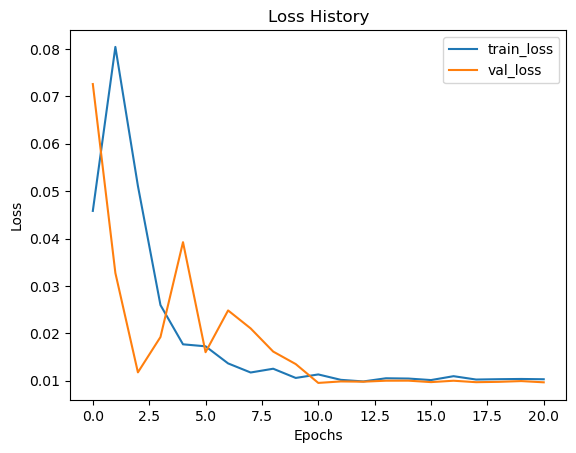

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

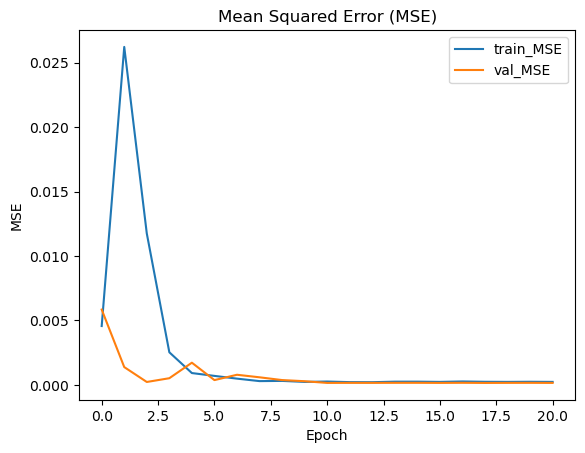

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

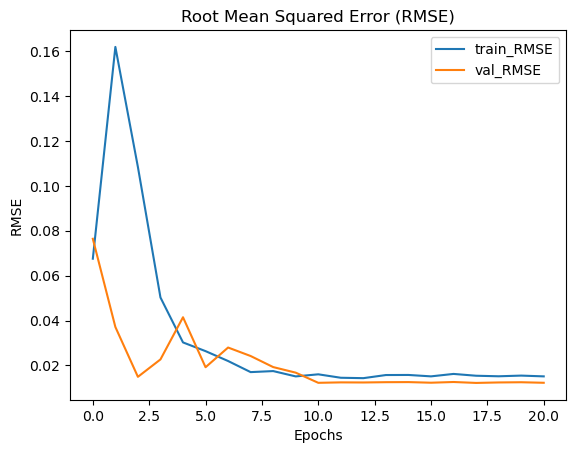

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

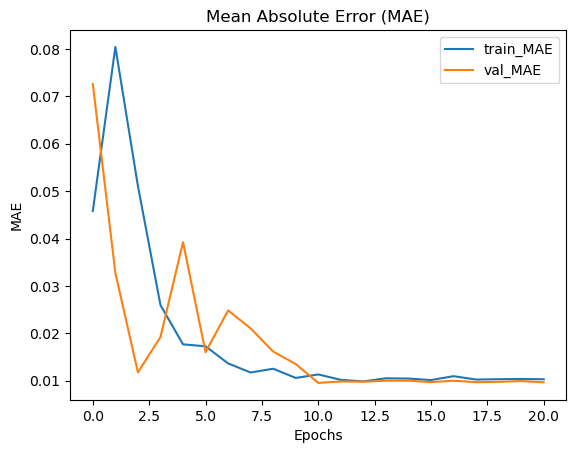

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

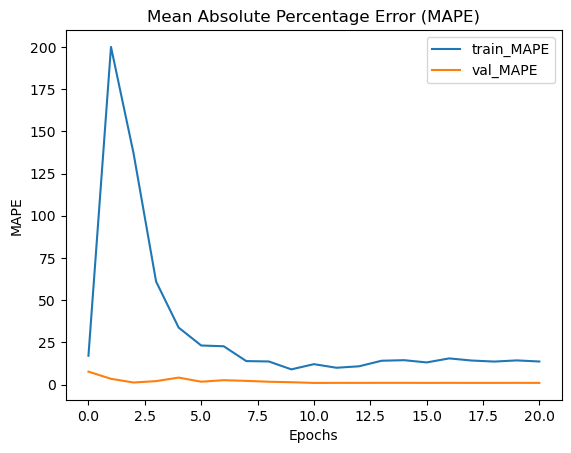

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:58:07.957811: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


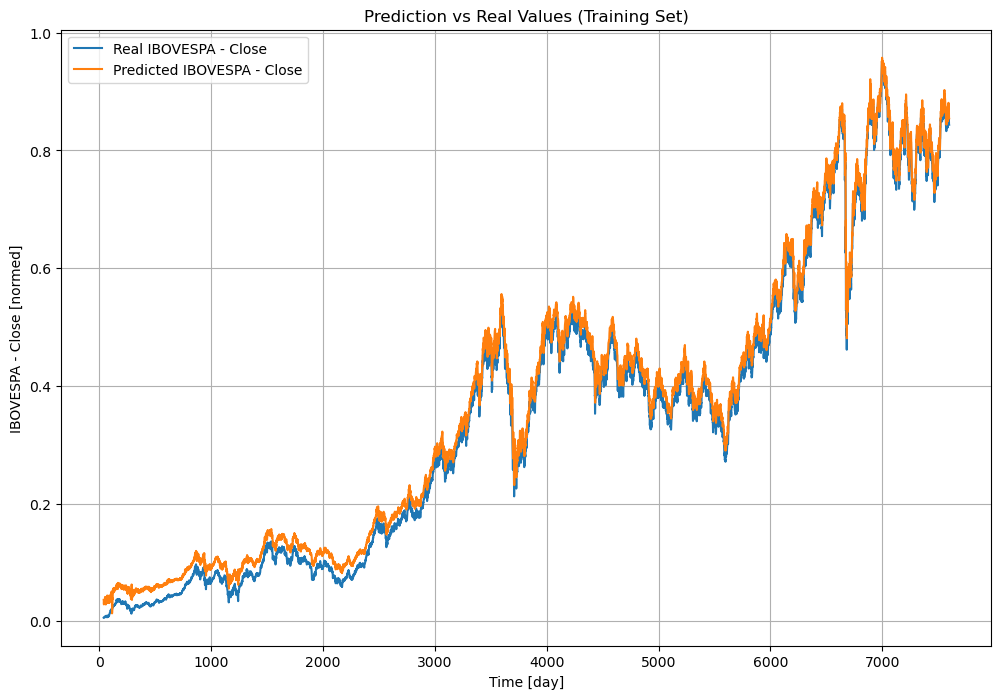

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


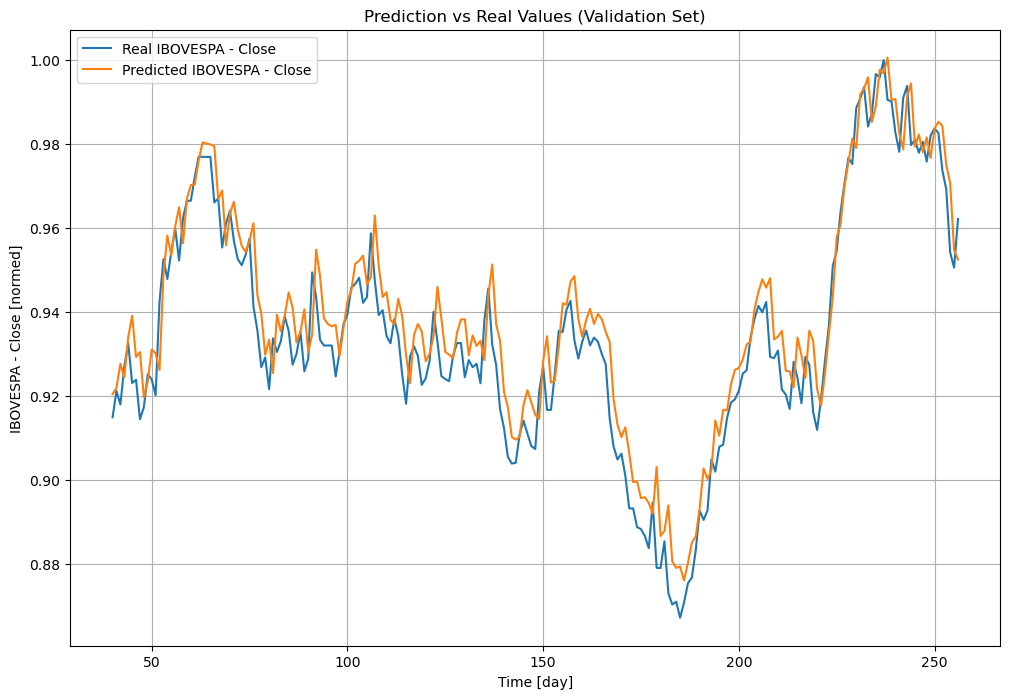

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


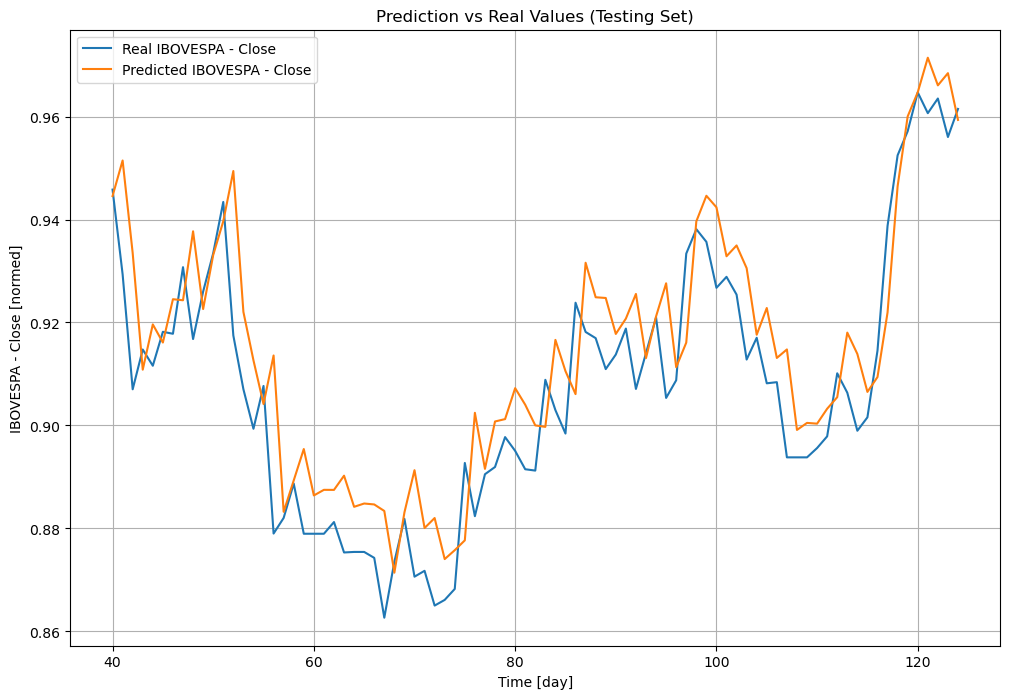

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

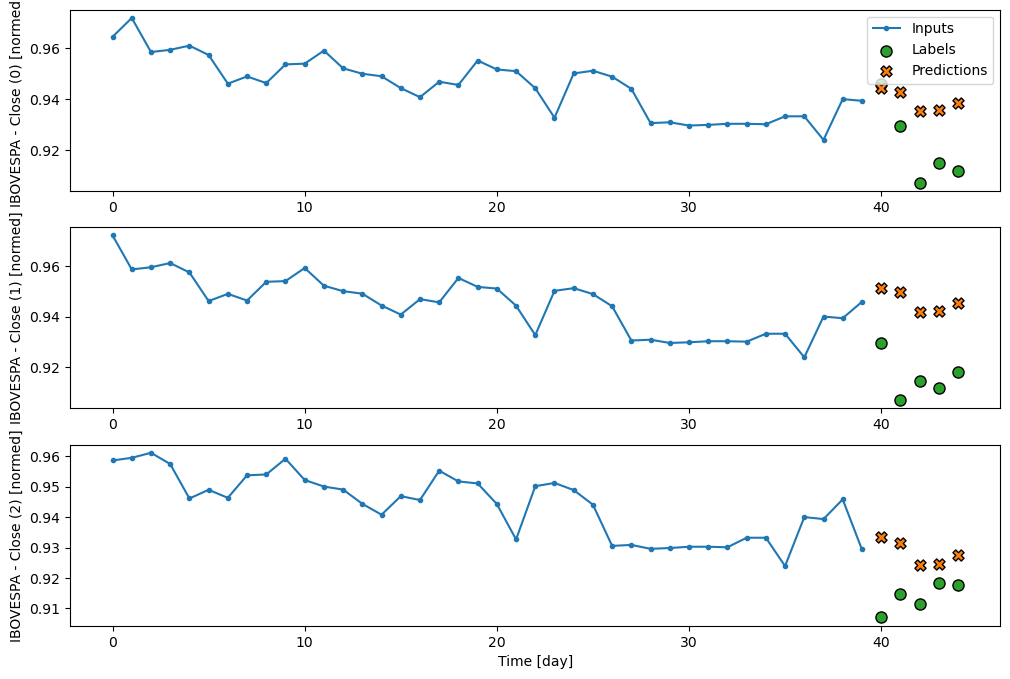

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:57s:582ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


array([[[0.9445538 , 0.9445538 , 0.9445538 , ..., 0.9445538 ,
         0.9445538 , 0.9445538 ],
        [0.94264346, 0.94264346, 0.94264346, ..., 0.94264346,
         0.94264346, 0.94264346],
        [0.9351208 , 0.9351208 , 0.9351208 , ..., 0.9351208 ,
         0.9351208 , 0.9351208 ],
        [0.9356781 , 0.9356781 , 0.9356781 , ..., 0.9356781 ,
         0.9356781 , 0.9356781 ],
        [0.9386686 , 0.9386686 , 0.9386686 , ..., 0.9386686 ,
         0.9402386 , 0.9402386 ]],

       [[0.95146435, 0.95146435, 0.95146435, ..., 0.95146435,
         0.95146435, 0.95146435],
        [0.9494996 , 0.9494996 , 0.9494996 , ..., 0.9494996 ,
         0.9494996 , 0.9494996 ],
        [0.941677  , 0.941677  , 0.941677  , ..., 0.941677  ,
         0.941677  , 0.941677  ],
        [0.9422351 , 0.9422351 , 0.9422351 , ..., 0.9422351 ,
         0.9422351 , 0.9422351 ],
        [0.9452477 , 0.9452477 , 0.9452477 , ..., 0.9452477 ,
         0.9468328 , 0.9468328 ]],

       [[0.9334889 , 0.9334889 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')